<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Laptop-Prices-prediction-using-Regression-ML-model" data-toc-modified-id="Laptop-Prices-prediction-using-Regression-ML-model-1"><span class="toc-item-num">1&nbsp;&nbsp;</span><strong>Laptop Prices prediction using Regression ML model</strong></a></span></li><li><span><a href="#Source-link" data-toc-modified-id="Source-link-2"><span class="toc-item-num">2&nbsp;&nbsp;</span><strong>Source link</strong></a></span></li><li><span><a href="#Preliminary" data-toc-modified-id="Preliminary-3"><span class="toc-item-num">3&nbsp;&nbsp;</span><strong>Preliminary</strong></a></span></li><li><span><a href="#Knowing-the-data" data-toc-modified-id="Knowing-the-data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span><strong>Knowing the data</strong></a></span></li><li><span><a href="#Conclusions:" data-toc-modified-id="Conclusions:-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Conclusions:</a></span></li><li><span><a href="#EDA---Data-Exploration" data-toc-modified-id="EDA---Data-Exploration-6"><span class="toc-item-num">6&nbsp;&nbsp;</span><strong>EDA - Data Exploration</strong></a></span></li><li><span><a href="#Data-Cleaning" data-toc-modified-id="Data-Cleaning-7"><span class="toc-item-num">7&nbsp;&nbsp;</span><strong>Data Cleaning</strong></a></span></li><li><span><a href="#Data-Manipulation" data-toc-modified-id="Data-Manipulation-8"><span class="toc-item-num">8&nbsp;&nbsp;</span><strong>Data Manipulation</strong></a></span></li><li><span><a href="#Decision-Tree-Model" data-toc-modified-id="Decision-Tree-Model-9"><span class="toc-item-num">9&nbsp;&nbsp;</span><strong>Decision Tree Model</strong></a></span></li><li><span><a href="#remove-Ram" data-toc-modified-id="remove-Ram-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>remove Ram</a></span></li><li><span><a href="#remove-all-prediction-more-3000" data-toc-modified-id="remove-all-prediction-more-3000-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>remove all prediction more 3000</a></span></li><li><span><a href="#Random-Forest-Model" data-toc-modified-id="Random-Forest-Model-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Random Forest Model</a></span></li><li><span><a href="#randomForest-after-Grid-search" data-toc-modified-id="randomForest-after-Grid-search-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>randomForest after Grid search</a></span></li><li><span><a href="#change-columns-type-to-category" data-toc-modified-id="change-columns-type-to-category-14"><span class="toc-item-num">14&nbsp;&nbsp;</span>change columns type to category</a></span></li><li><span><a href="#split-data" data-toc-modified-id="split-data-15"><span class="toc-item-num">15&nbsp;&nbsp;</span>split data</a></span></li><li><span><a href="#split-less-then-3000" data-toc-modified-id="split-less-then-3000-16"><span class="toc-item-num">16&nbsp;&nbsp;</span>split less then 3000</a></span></li><li><span><a href="#final-df" data-toc-modified-id="final-df-17"><span class="toc-item-num">17&nbsp;&nbsp;</span>final df</a></span></li><li><span><a href="#end-code-of-itay" data-toc-modified-id="end-code-of-itay-18"><span class="toc-item-num">18&nbsp;&nbsp;</span>end code of itay</a></span></li><li><span><a href="#if-required-to-re-run-the-model" data-toc-modified-id="if-required-to-re-run-the-model-19"><span class="toc-item-num">19&nbsp;&nbsp;</span>if required to re-run the model</a></span></li><li><span><a href="#Linear-Regression-Model" data-toc-modified-id="Linear-Regression-Model-20"><span class="toc-item-num">20&nbsp;&nbsp;</span>Linear Regression Model</a></span></li><li><span><a href="#K-Nearest-Neighbors-Model" data-toc-modified-id="K-Nearest-Neighbors-Model-21"><span class="toc-item-num">21&nbsp;&nbsp;</span>K Nearest Neighbors Model</a></span></li></ul></div>

<a href="https://colab.research.google.com/github/DanielKorenDataScience/RegressionProject/blob/main/Regression%20Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Laptop Prices prediction using Regression ML model**

# **Source link**

https://www.kaggle.com/muhammetvarl/laptop-price

# **Preliminary**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import requests
import sys
import os
import re

# For transformations and predictions
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import pairwise_distances
from sklearn.ensemble import RandomForestRegressor

# For the tree visualization
import pydot
from IPython.display import Image
from sklearn.externals.six import StringIO

# For scoring
from sklearn.metrics import mean_squared_log_error as msle
from sklearn.metrics import mean_squared_error as mse

# For validation
from sklearn.model_selection import train_test_split as split

%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data_url = 'https://raw.githubusercontent.com/DanielKorenDataScience/RegressionProject/master/laptop_price.csv'
resp = requests.get(data_url)
text = resp.text

with open('laptop_price.csv', 'w') as fh:
    fh.write(text)
  
df = pd.read_csv('laptop_price.csv')

In [2]:
df = pd.read_csv('laptop_price (2).csv', encoding='ISO-8859–1')

In [3]:
df.head()

laptop_ID Company      Product   TypeName  Inches  \
0          1   Apple  MacBook Pro  Ultrabook    13.3   
1          2   Apple  Macbook Air  Ultrabook    13.3   
2          3      HP       250 G6   Notebook    15.6   
3          4   Apple  MacBook Pro  Ultrabook    15.4   
4          5   Apple  MacBook Pro  Ultrabook    13.3   

                     ScreenResolution                         Cpu   Ram  \
0  IPS Panel Retina Display 2560x1600        Intel Core i5 2.3GHz   8GB   
1                            1440x900        Intel Core i5 1.8GHz   8GB   
2                   Full HD 1920x1080  Intel Core i5 7200U 2.5GHz   8GB   
3  IPS Panel Retina Display 2880x1800        Intel Core i7 2.7GHz  16GB   
4  IPS Panel Retina Display 2560x1600        Intel Core i5 3.1GHz   8GB   

                Memory                           Gpu  OpSys  Weight  \
0            128GB SSD  Intel Iris Plus Graphics 640  macOS  1.37kg   
1  128GB Flash Storage        Intel HD Graphics 6000  macOS  1.34kg   
2            256GB SSD         Intel HD Graphics 620  No OS  1.86kg   
3            512GB SSD            AMD Radeon Pro 455  macOS  1.83kg   
4            256GB SSD  Intel Iris Plus Graphics 650  macOS  1.37kg   

   Price_euros  
0      1339.69  
1       898.94  
2       575.00  
3      2537.45  
4      1803.60

# **Knowing the data**

In [4]:
df.head(5)

laptop_ID Company      Product   TypeName  Inches  \
0          1   Apple  MacBook Pro  Ultrabook    13.3   
1          2   Apple  Macbook Air  Ultrabook    13.3   
2          3      HP       250 G6   Notebook    15.6   
3          4   Apple  MacBook Pro  Ultrabook    15.4   
4          5   Apple  MacBook Pro  Ultrabook    13.3   

                     ScreenResolution                         Cpu   Ram  \
0  IPS Panel Retina Display 2560x1600        Intel Core i5 2.3GHz   8GB   
1                            1440x900        Intel Core i5 1.8GHz   8GB   
2                   Full HD 1920x1080  Intel Core i5 7200U 2.5GHz   8GB   
3  IPS Panel Retina Display 2880x1800        Intel Core i7 2.7GHz  16GB   
4  IPS Panel Retina Display 2560x1600        Intel Core i5 3.1GHz   8GB   

                Memory                           Gpu  OpSys  Weight  \
0            128GB SSD  Intel Iris Plus Graphics 640  macOS  1.37kg   
1  128GB Flash Storage        Intel HD Graphics 6000  macOS  1.34kg   
2            256GB SSD         Intel HD Graphics 620  No OS  1.86kg   
3            512GB SSD            AMD Radeon Pro 455  macOS  1.83kg   
4            256GB SSD  Intel Iris Plus Graphics 650  macOS  1.37kg   

   Price_euros  
0      1339.69  
1       898.94  
2       575.00  
3      2537.45  
4      1803.60

In [5]:
df.nunique()

laptop_ID           1303
Company               19
Product              618
TypeName               6
Inches                18
ScreenResolution      40
Cpu                  118
Ram                    9
Memory                39
Gpu                  110
OpSys                  9
Weight               179
Price_euros          791
dtype: int64

In [6]:
df.describe()

laptop_ID       Inches  Price_euros
count  1303.000000  1303.000000  1303.000000
mean    660.155794    15.017191  1123.686992
std     381.172104     1.426304   699.009043
min       1.000000    10.100000   174.000000
25%     331.500000    14.000000   599.000000
50%     659.000000    15.600000   977.000000
75%     990.500000    15.600000  1487.880000
max    1320.000000    18.400000  6099.000000

In [7]:
df.T

0                       1     \
laptop_ID                                          1                       2   
Company                                        Apple                   Apple   
Product                                  MacBook Pro             Macbook Air   
TypeName                                   Ultrabook               Ultrabook   
Inches                                          13.3                    13.3   
ScreenResolution  IPS Panel Retina Display 2560x1600                1440x900   
Cpu                             Intel Core i5 2.3GHz    Intel Core i5 1.8GHz   
Ram                                              8GB                     8GB   
Memory                                     128GB SSD     128GB Flash Storage   
Gpu                     Intel Iris Plus Graphics 640  Intel HD Graphics 6000   
OpSys                                          macOS                   macOS   
Weight                                        1.37kg                  1.34kg   
Price_euros                                  1339.69                  898.94   

                                        2     \
laptop_ID                                  3   
Company                                   HP   
Product                               250 G6   
TypeName                            Notebook   
Inches                                  15.6   
ScreenResolution           Full HD 1920x1080   
Cpu               Intel Core i5 7200U 2.5GHz   
Ram                                      8GB   
Memory                             256GB SSD   
Gpu                    Intel HD Graphics 620   
OpSys                                  No OS   
Weight                                1.86kg   
Price_euros                              575   

                                                3     \
laptop_ID                                          4   
Company                                        Apple   
Product                                  MacBook Pro   
TypeName                                   Ultrabook   
Inches                                          15.4   
ScreenResolution  IPS Panel Retina Display 2880x1800   
Cpu                             Intel Core i7 2.7GHz   
Ram                                             16GB   
Memory                                     512GB SSD   
Gpu                               AMD Radeon Pro 455   
OpSys                                          macOS   
Weight                                        1.83kg   
Price_euros                                  2537.45   

                                                4                        5     \
laptop_ID                                          5                        6   
Company                                        Apple                     Acer   
Product                                  MacBook Pro                 Aspire 3   
TypeName                                   Ultrabook                 Notebook   
Inches                                          13.3                     15.6   
ScreenResolution  IPS Panel Retina Display 2560x1600                 1366x768   
Cpu                             Intel Core i5 3.1GHz  AMD A9-Series 9420 3GHz   
Ram                                              8GB                      4GB   
Memory                                     256GB SSD                500GB HDD   
Gpu                     Intel Iris Plus Graphics 650            AMD Radeon R5   
OpSys                                          macOS               Windows 10   
Weight                                        1.37kg                    2.1kg   
Price_euros                                   1803.6                      400   

                                                6                       7     \
laptop_ID                                          7                       8   
Company                                        Apple                   Apple   
Product                                  MacBook Pro             Macbook Air   
TypeName      

In [8]:
df.info(null_counts=True) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [9]:
col = list(df.columns)
for column in col: #.split():
    print(column, ':')
#    df[column] = df[column].str.strip()
    print(df[column].value_counts())
    print()

    """ Product, Screen Resolution, CPU, Weight """

laptop_ID :
1320    1
453     1
435     1
436     1
437     1
       ..
880     1
881     1
882     1
883     1
1       1
Name: laptop_ID, Length: 1303, dtype: int64

Company :
Lenovo       297
Dell         297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Mediacom       7
Razer          7
Microsoft      6
Xiaomi         4
Vero           4
LG             3
Fujitsu        3
Chuwi          3
Google         3
Huawei         2
Name: Company, dtype: int64

Product :
XPS 13                                  30
Inspiron 3567                           29
250 G6                                  21
Legion Y520-15IKBN                      19
Vostro 3568                             19
                                        ..
E5 774G                                  1
Latitude 3570                            1
15-cd005nv (A9-9420/6GB/256GB/Radeon     1
PL60 7RD                                 1
Ideapad 320-15IKBN             

# Conclusions:
1. laptop_ID - Unique, not relevant to the model
2. Company - need to split category to columns
3. Product - ???
4. TypeName - need to split category to columns
5. Inches - need to make rounded
6. ScreenResolution - ???
7. Cpu - I think we should smart seperate to manufacturer and have the model in some other way !?
8. Ram - numeric
9. Memory - storage
10. Gpu - category to column !?
11. OpSys - Important -- category to columns 
12. Weight
13. Price_euros - ***Predict***

# **EDA - Data Exploration**

In [10]:
df.head(3)

laptop_ID Company      Product   TypeName  Inches  \
0          1   Apple  MacBook Pro  Ultrabook    13.3   
1          2   Apple  Macbook Air  Ultrabook    13.3   
2          3      HP       250 G6   Notebook    15.6   

                     ScreenResolution                         Cpu  Ram  \
0  IPS Panel Retina Display 2560x1600        Intel Core i5 2.3GHz  8GB   
1                            1440x900        Intel Core i5 1.8GHz  8GB   
2                   Full HD 1920x1080  Intel Core i5 7200U 2.5GHz  8GB   

                Memory                           Gpu  OpSys  Weight  \
0            128GB SSD  Intel Iris Plus Graphics 640  macOS  1.37kg   
1  128GB Flash Storage        Intel HD Graphics 6000  macOS  1.34kg   
2            256GB SSD         Intel HD Graphics 620  No OS  1.86kg   

   Price_euros  
0      1339.69  
1       898.94  
2       575.00

In [11]:
sns.color_palette("coolwarm", as_cmap=True)
sns.set_theme(style="whitegrid")

TypeError: color_palette() got an unexpected keyword argument 'as_cmap'

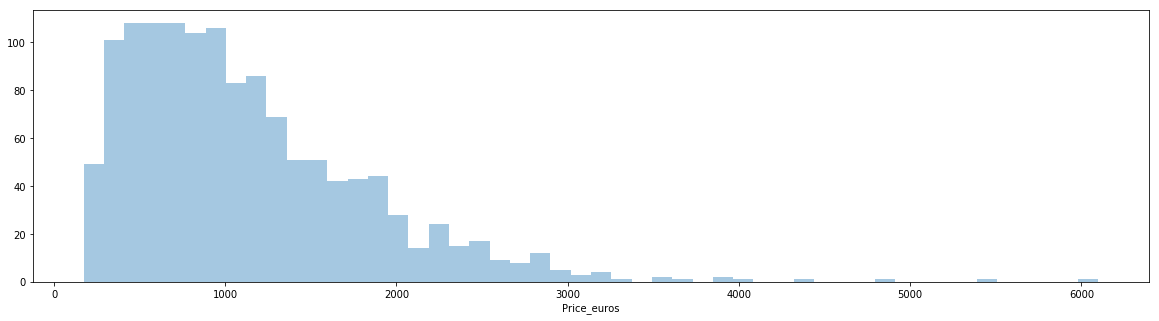

In [12]:
plt.figure(figsize=(20,5))
sns.distplot(df.Price_euros,bins=50, kde=False)

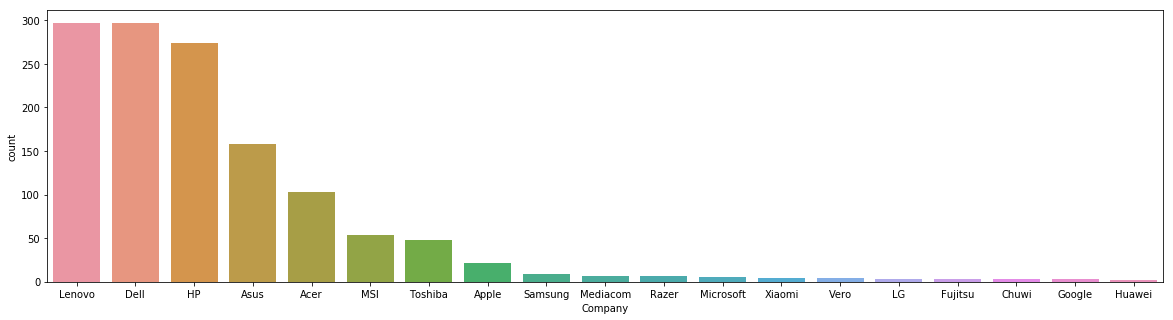

In [13]:
plt.figure(figsize=(20,5))
sns.countplot(data=df, x=df.Company, order = df['Company'].value_counts().index )

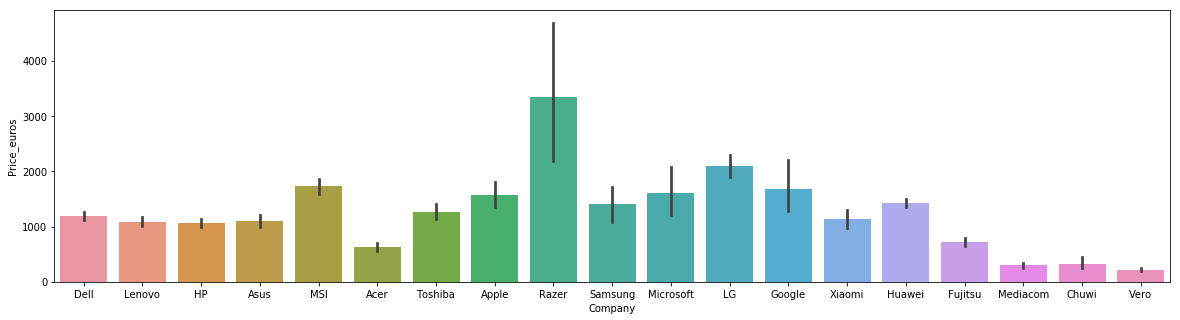

In [14]:
plt.figure(figsize=(20,5))
plot_order = df.groupby('Company')['Price_euros'].sum().sort_values(ascending=False).index.values
sns.barplot(data=df, x=df.Company, y=df.Price_euros, order=plot_order )

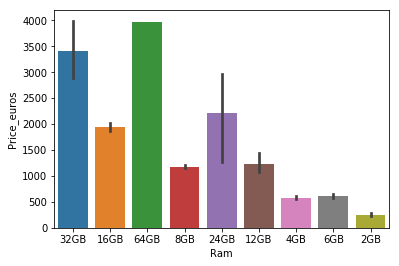

In [15]:
df.sort_values('Price_euros', inplace=True, ascending=False)
sns.barplot(data=df, x=df['Ram'], y=df['Price_euros'])

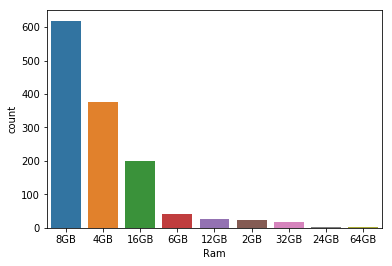

In [16]:
sns.countplot(data=df, x='Ram', order = df['Ram'].value_counts().index)

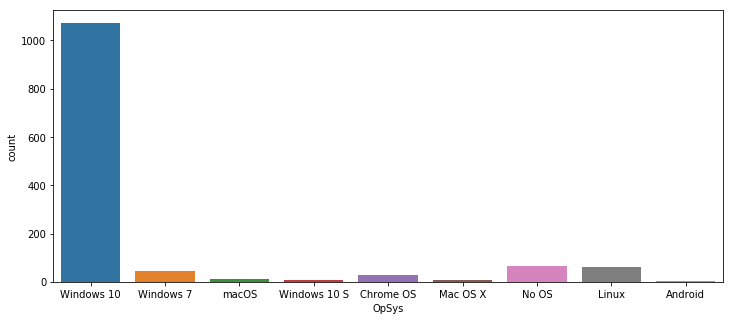

In [17]:
plt.figure(figsize=(12,5))
sns.countplot(data=df, x='OpSys') #, y='Price_euros')

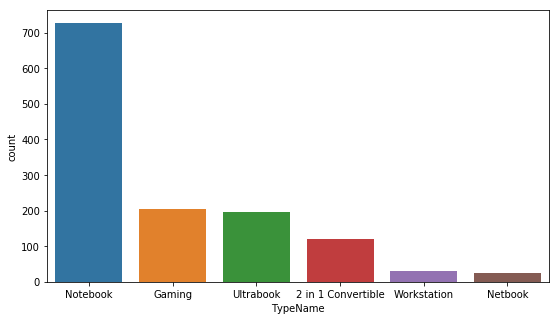

In [18]:
plt.figure(figsize=(9,5))
plot_order = df.groupby('TypeName')['Price_euros'].count().sort_values(ascending=False).index.values
sns.countplot(data=df, x='TypeName', order=plot_order)

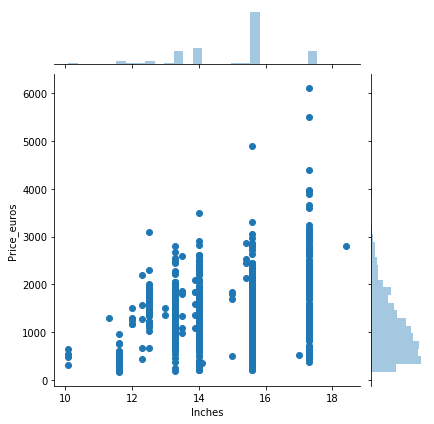

In [19]:
sns.jointplot(x='Inches',y='Price_euros', kind='scatter', data=df)

TypeError: can't multiply sequence by non-int of type 'float'

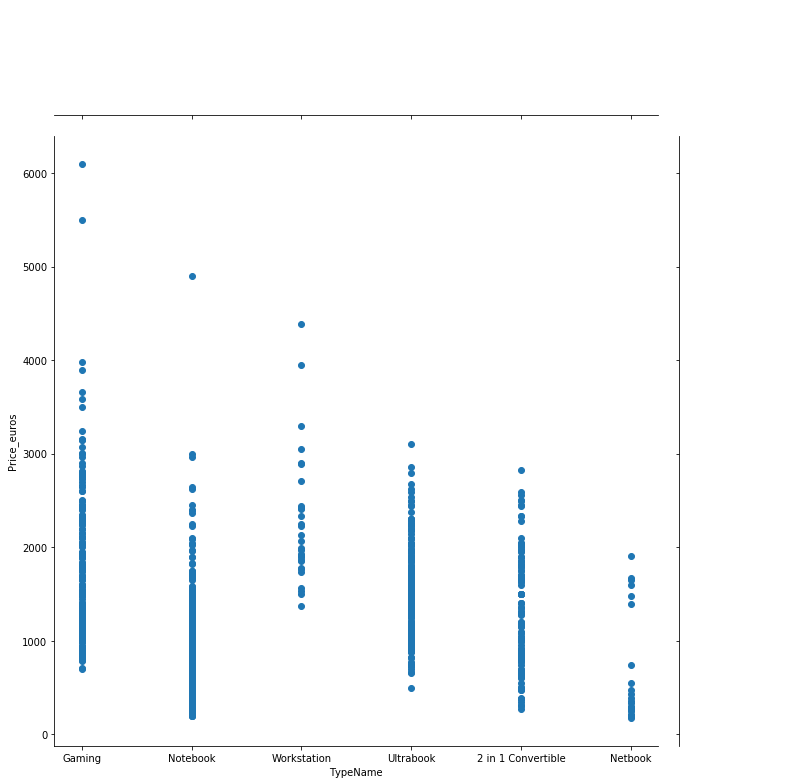

In [20]:
sns.jointplot(x='TypeName', y='Price_euros', kind='scatter', data=df, height=11)

# **Data Cleaning**

In [21]:
df.Price_euros.sort_values().tail(10)

1231    3499.0
780     3588.8
723     3659.4
238     3890.0
1136    3949.4
1066    3975.0
749     4389.0
610     4899.0
830     5499.0
196     6099.0
Name: Price_euros, dtype: float64

In [22]:
#removing noisy values - prices over 3000
#df = df[df['Price_euros'] <= 3000]

# **Data Manipulation**

In [23]:
df.nunique()

laptop_ID           1303
Company               19
Product              618
TypeName               6
Inches                18
ScreenResolution      40
Cpu                  118
Ram                    9
Memory                39
Gpu                  110
OpSys                  9
Weight               179
Price_euros          791
dtype: int64

In [24]:
df.head(2)

laptop_ID Company    Product TypeName  Inches  \
196        200   Razer  Blade Pro   Gaming    17.3   
830        839   Razer  Blade Pro   Gaming    17.3   

                        ScreenResolution                          Cpu   Ram  \
196  4K Ultra HD / Touchscreen 3840x2160  Intel Core i7 7820HK 2.9GHz  32GB   
830  4K Ultra HD / Touchscreen 3840x2160  Intel Core i7 7820HK 2.9GHz  32GB   

        Memory                      Gpu       OpSys  Weight  Price_euros  
196    1TB SSD  Nvidia GeForce GTX 1080  Windows 10  3.49kg       6099.0  
830  512GB SSD  Nvidia GeForce GTX 1080  Windows 10  3.49kg       5499.0

In [25]:
df_Company = pd.get_dummies(df.Company, prefix='co_')
df_Product = pd.get_dummies(df.Product, prefix='prd_')
df_TypName = pd.get_dummies(df.TypeName, prefix='tpn_')
df_os = pd.get_dummies(df.OpSys, prefix='os_')

In [26]:
# Round inch information 
df.Inches = df.Inches.round()

# Ram to number
df.Ram = df.Ram.str.replace('GB','').astype(int)

# Weight to number
df.Weight = df.Weight.str.replace('kg','').astype(float)

# Memory to number
# memory split
df['Memory_SSD']= np.where(df.Memory.str.find("SSD")==-1,0,1)
df['Memory_Flash_Storage']= np.where(df.Memory.str.find("Flash Storage")==-1,0,1)
df['Memory_HDD']= np.where(df.Memory.str.find("HDD")==-1,0,1)
df['Memory_Hybrid']= np.where(df.Memory.str.find("Hybrid")==-1,0,1)
df['Storage_amt'] = df.Memory.str.split().str[0]
storage_map = {'1.0TB':'1000', '1TB':'1000', '2TB':'2000', '508':'500'}
df.Storage_amt.replace(storage_map , inplace=True)
df.Storage_amt = df.Storage_amt.str.replace('GB','').astype(int)

# Split Cpu information 
df['Cpu_brand'] = df.Cpu.str.split().str[0]
df['Cpu_speed'] = df.Cpu.str.split().str[-1]
df.Cpu_speed = df.Cpu_speed.str.split('GHz').str[0].astype(float)
#df['Cpu_model'] = 
df_Cpu_brand = pd.get_dummies(df.Cpu_brand, prefix='Cpu_')

# CPU
df['Cpu_HighSeries']=np.where((df.Cpu.str.split(" ",1).str[0]=="AMD") | (df.Cpu.str.split(" ",1).str[0]=="Samsung"),df.Cpu.str.split(" ",1).str[1].str.split(" ",1).str[0],
          np.where((df.Cpu.str.split(" ",1).str[0]=="Intel") & (df.Cpu.str.split(" ",1).str[1].str.split(" ",2).str[0].isin(['Xeon','Atom'])),df.Cpu.str.split(" ",1).str[1].str.split(" ",2).str[0],
          np.where(df.Cpu.str.split(" ",1).str[0]=="Intel",df.Cpu.str.split(" ",1).str[1].str.split(" ",2).str[0]+df.Cpu.str.split(" ",1).str[1].str.split(" ",2).str[1],     
          "missing")))
df_Cpu_HighSeries = pd.get_dummies(df.Cpu_HighSeries, prefix='CpuH_')

test1=df.Cpu.str.split().str[-2].str.split("-").str[-1]
test2=test1.apply(lambda x:re.findall(r'\d+|$',x)[0])
test2.replace([""],["0"],inplace=True)
test2=test2.astype(int)
df['Cpu_LowSeries']=np.where(test2<10,0,test2)

# Split Gpu information
df['Gpu_brand'] = df.Gpu.str.split().str[0]
df_Gpu_brand = pd.get_dummies(df.Gpu_brand, prefix='Gpu_')
df['Gpu_SubType']=np.where(df.Gpu.str.split(" ",2).str[1].isin(['Graphics','R17M-M1-70','Mali','R4']),'missing',df.Gpu.str.split(" ",2).str[1])
df_Gpu_SubType = pd.get_dummies(df.Gpu_SubType, prefix='GpuST_')

# Handle ScreenResolution information
df['Scr_to'] = df.ScreenResolution.str.split('x').str[-1].astype(int)
df['Scr_from'] = df.ScreenResolution.str.split('x').str[0]
df['Scr_from'] = df.Scr_from.str.split().str[-1].astype(int)
df['Scr_Touchscreen']=np.where(df.ScreenResolution.str.find("Touchscreen")>-1,1,0)
df['Scr_HD']=np.where(df.ScreenResolution.str.find("Full HD")>-1,'Full_HD',
                    np.where(df.ScreenResolution.str.find("Quad HD")>-1,'Quad_HD',
                    np.where(df.ScreenResolution.str.find("Ultra HD")>-1,'Ultra_HD',
                             'missing')))
df_Scr_HD = pd.get_dummies(df.Scr_HD, prefix='ScrHD_')

#Categorial change

In [27]:
def GroupPrice(GroupValue,dfOrg):
  df=dfOrg.groupby(GroupValue).agg({'Price_euros':[('avgPrice','mean'),('stdPrice',np.std)],'laptop_ID':[('countLaptop','count')]}).reset_index()
  df.columns=df.columns.droplevel(0)
  df.columns.values[0]=GroupValue
  df.sort_values('countLaptop',ascending=False,inplace=True)
  valueByPrice=df.sort_values('avgPrice',ascending=False)[GroupValue].tolist()
  print(valueByPrice)
  dict_map = dict(zip(valueByPrice, range(len(valueByPrice))))
  dfOrg.loc[:, GroupValue+'Num'] = dfOrg[GroupValue].map(dict_map)
  return dfOrg

In [28]:
df=GroupPrice('Company',df)
display(df[['Company','CompanyNum']].head(10))

['Razer', 'LG', 'MSI', 'Google', 'Microsoft', 'Apple', 'Huawei', 'Samsung', 'Toshiba', 'Dell', 'Xiaomi', 'Asus', 'Lenovo', 'HP', 'Fujitsu', 'Acer', 'Chuwi', 'Mediacom', 'Vero']


Company  CompanyNum
196    Razer           0
830    Razer           0
610   Lenovo          12
749       HP          13
1066    Asus          11
1136      HP          13
238     Asus          11
723     Dell           9
780     Dell           9
1231   Razer           0

In [29]:
types=GroupPrice('TypeName',df)
display(types[['TypeName','TypeNameNum']].head(10))

['Workstation', 'Gaming', 'Ultrabook', '2 in 1 Convertible', 'Notebook', 'Netbook']


TypeName  TypeNameNum
196        Gaming            1
830        Gaming            1
610      Notebook            4
749   Workstation            0
1066       Gaming            1
1136  Workstation            0
238        Gaming            1
723        Gaming            1
780        Gaming            1
1231       Gaming            1

In [30]:
df=GroupPrice('Scr_HD',df)
display(df[['Scr_HD','Scr_HDNum']].head(10))

['Ultra_HD', 'Quad_HD', 'Full_HD', 'missing']


Scr_HD  Scr_HDNum
196   Ultra_HD          0
830   Ultra_HD          0
610   Ultra_HD          0
749    Full_HD          2
1066   Full_HD          2
1136   Full_HD          2
238    Full_HD          2
723   Ultra_HD          0
780    Full_HD          2
1231   Full_HD          2

In [31]:
df=GroupPrice('Cpu_HighSeries',df)
display(df[['Cpu_HighSeries','Cpu_HighSeriesNum']].head(10))

['Xeon', 'Ryzen', 'Corei7', 'CoreM', 'Corei5', 'FX', 'Cortex', 'A12-Series', 'A10-Series', 'PentiumDual', 'Corei3', 'A9-Series', 'A8-Series', 'PentiumQuad', 'A6-Series', 'CeleronQuad', 'A4-Series', 'Atom', 'CeleronDual', 'E-Series']


Cpu_HighSeries  Cpu_HighSeriesNum
196          Corei7                  2
830          Corei7                  2
610            Xeon                  0
749            Xeon                  0
1066         Corei7                  2
1136         Corei7                  2
238          Corei7                  2
723          Corei7                  2
780          Corei7                  2
1231         Corei7                  2

In [32]:
df=GroupPrice('Gpu_brand',df)
display(df[['Gpu_brand','Gpu_brandNum']].head(10))

['Nvidia', 'Intel', 'AMD', 'ARM']


Gpu_brand  Gpu_brandNum
196     Nvidia             0
830     Nvidia             0
610     Nvidia             0
749     Nvidia             0
1066    Nvidia             0
1136    Nvidia             0
238     Nvidia             0
723     Nvidia             0
780     Nvidia             0
1231    Nvidia             0

In [33]:
df=GroupPrice('Gpu_SubType',df)
display(df[['Gpu_SubType','Gpu_SubTypeNum']].head(10))

['GTX', 'Quadro', 'Iris', 'FirePro', 'GeForce', 'UHD', 'HD', 'Radeon', 'missing']


Gpu_SubType  Gpu_SubTypeNum
196      GeForce               4
830      GeForce               4
610       Quadro               1
749       Quadro               1
1066     GeForce               4
1136      Quadro               1
238      GeForce               4
723      GeForce               4
780      GeForce               4
1231     GeForce               4

In [34]:
df=GroupPrice('OpSys',df)
display(df[['OpSys','OpSysNum']].head(10))

['macOS', 'Windows 7', 'Windows 10 S', 'Mac OS X', 'Windows 10', 'Linux', 'No OS', 'Chrome OS', 'Android']


OpSys  OpSysNum
196   Windows 10         4
830   Windows 10         4
610   Windows 10         4
749    Windows 7         1
1066  Windows 10         4
1136   Windows 7         1
238   Windows 10         4
723   Windows 10         4
780   Windows 10         4
1231  Windows 10         4

In [35]:
df.head(2)

laptop_ID Company    Product TypeName  Inches  \
196        200   Razer  Blade Pro   Gaming    17.0   
830        839   Razer  Blade Pro   Gaming    17.0   

                        ScreenResolution                          Cpu  Ram  \
196  4K Ultra HD / Touchscreen 3840x2160  Intel Core i7 7820HK 2.9GHz   32   
830  4K Ultra HD / Touchscreen 3840x2160  Intel Core i7 7820HK 2.9GHz   32   

        Memory                      Gpu  ... Scr_from  Scr_Touchscreen  \
196    1TB SSD  Nvidia GeForce GTX 1080  ...     3840                1   
830  512GB SSD  Nvidia GeForce GTX 1080  ...     3840                1   

       Scr_HD  CompanyNum  TypeNameNum  Scr_HDNum  Cpu_HighSeriesNum  \
196  Ultra_HD           0            1          0                  2   
830  Ultra_HD           0            1          0                  2   

     Gpu_brandNum Gpu_SubTypeNum  OpSysNum  
196             0              4         4  
830             0              4         4  

[2 rows x 35 columns]

In [36]:
df_model=df[['Inches', 'Ram', 'Weight',  'Storage_amt', 'Cpu_speed', 'Scr_from', 'Scr_to','Memory_SSD','Memory_Flash_Storage','Memory_HDD','Memory_Hybrid','Cpu_LowSeries',
             'Scr_Touchscreen','CompanyNum','TypeNameNum','Scr_HDNum','Cpu_HighSeriesNum','Gpu_brandNum','Gpu_SubTypeNum','OpSysNum','Price_euros']].copy()

In [37]:
df_model.shape

(1303, 21)

In [38]:
df_model.head(2)

Inches  Ram  Weight  Storage_amt  Cpu_speed  Scr_from  Scr_to  \
196    17.0   32    3.49         1000        2.9      3840    2160   
830    17.0   32    3.49          512        2.9      3840    2160   

     Memory_SSD  Memory_Flash_Storage  Memory_HDD  ...  Cpu_LowSeries  \
196           1                     0           0  ...           7820   
830           1                     0           0  ...           7820   

     Scr_Touchscreen  CompanyNum  TypeNameNum  Scr_HDNum  Cpu_HighSeriesNum  \
196                1           0            1          0                  2   
830                1           0            1          0                  2   

     Gpu_brandNum  Gpu_SubTypeNum  OpSysNum  Price_euros  
196             0               4         4       6099.0  
830             0               4         4       5499.0  

[2 rows x 21 columns]

In [39]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1303 entries, 196 to 1215
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Inches                1303 non-null   float64
 1   Ram                   1303 non-null   int32  
 2   Weight                1303 non-null   float64
 3   Storage_amt           1303 non-null   int32  
 4   Cpu_speed             1303 non-null   float64
 5   Scr_from              1303 non-null   int32  
 6   Scr_to                1303 non-null   int32  
 7   Memory_SSD            1303 non-null   int32  
 8   Memory_Flash_Storage  1303 non-null   int32  
 9   Memory_HDD            1303 non-null   int32  
 10  Memory_Hybrid         1303 non-null   int32  
 11  Cpu_LowSeries         1303 non-null   int32  
 12  Scr_Touchscreen       1303 non-null   int32  
 13  CompanyNum            1303 non-null   int64  
 14  TypeNameNum           1303 non-null   int64  
 15  Scr_HDNum          

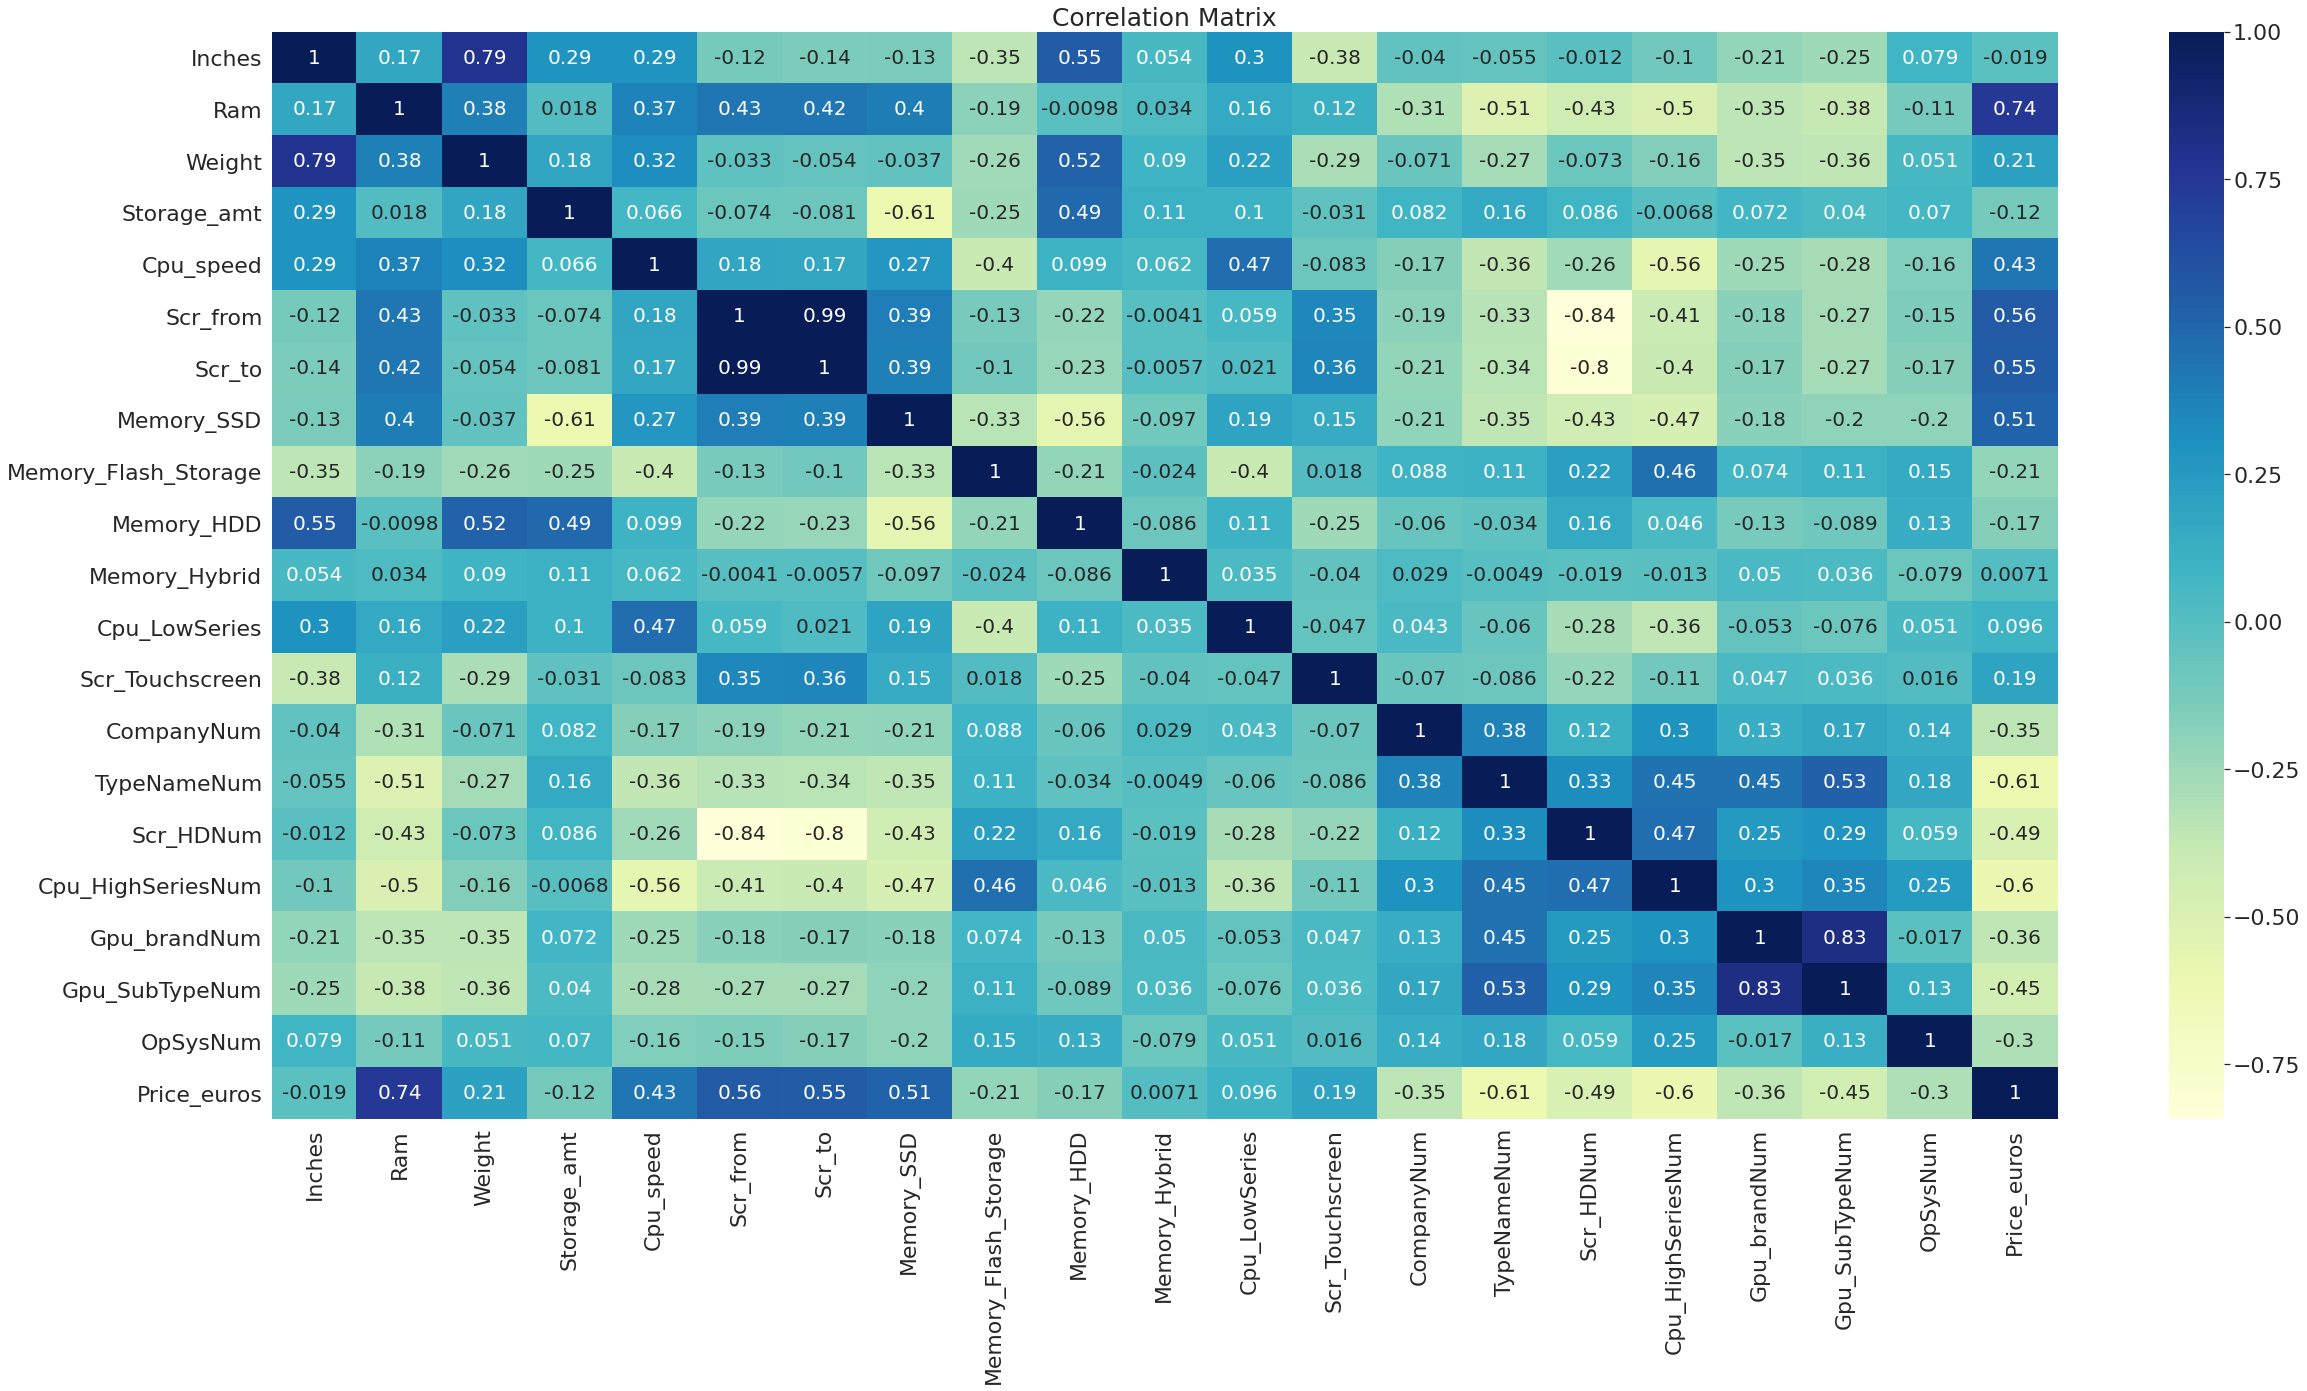

In [63]:
# Sample figsize in inches
fig, ax = plt.subplots(figsize=(40,20))        
# Imbalanced DataFrame Correlation
corr = df_model.corr()
sns.heatmap(corr, cmap='YlGnBu', annot_kws={'size':20},annot=True, ax=ax)
sns.set(font_scale=5)
ax.set_title("Correlation Matrix", fontsize=25)
plt.show()

In [64]:
sns.set(font_scale=2)

In [ ]:
# # Combining the Data
# df_model = pd.merge(df[['Inches', 'Ram', 'Weight', 'Price_euros', 'Storage_amt', 'Cpu_speed', 'Scr_from', 'Scr_to','Memory_SSD','Memory_Flash_Storage','Memory_HDD','Memory_Hybrid','Cpu_LowSeries','Scr_Touchscreen']], df_Company, left_index=True, right_index=True)
# df_model = pd.merge(df_model, df_Product, left_index=True, right_index=True)
# df_model = pd.merge(df_model, df_TypName, left_index=True, right_index=True)
# df_model = pd.merge(df_model, df_os, left_index=True, right_index=True)
# df_model = pd.merge(df_model, df_Cpu_brand, left_index=True, right_index=True)
# df_model = pd.merge(df_model, df_Gpu_brand, left_index=True, right_index=True)
# df_model = pd.merge(df_model, df_Cpu_HighSeries, left_index=True, right_index=True)
# df_model = pd.merge(df_model, df_Gpu_SubType, left_index=True, right_index=True)
# df_model = pd.merge(df_model, df_Scr_HD, left_index=True, right_index=True)
# #df.drop(['Company', 'Product', 'TypeName', 'ScreenResolution', 'Cpu', 'Memory', 'Gpu', 'OpSys'], axis=1, inplace=True)

# df_model.head(2)

In [40]:
df_model.shape

(1303, 21)

In [41]:
def rmsle(a,b):
    return msle(a,b) ** 0.5

# **Decision Tree Model**

In [42]:
X = df_model.drop('Price_euros', axis=1)
y = df_model['Price_euros']
feature_list = list(X.columns)

In [44]:
X_train, X_test, y_train, y_test = split(X, y, test_size=0.3, random_state=314159)

In [45]:
#model = RandomForestClassifier()
model = DecisionTreeRegressor(max_depth=6, min_samples_leaf=4,min_samples_split=16).fit(X_train, y_train)

In [164]:
y_train_pred = model.predict(X_train)

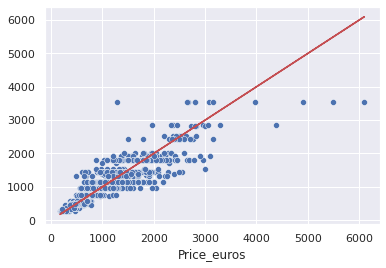

In [165]:
ax = sns.scatterplot(x=y_train, y=y_train_pred)
ax.plot(y_train, y_train, 'r')
# sns.set(font_scale=1.2)

In [166]:
RMSE = mse(y_train, y_train_pred)**0.5
RMSE

333.15973906898427

In [167]:
y_test_pred = model.predict(X_test)

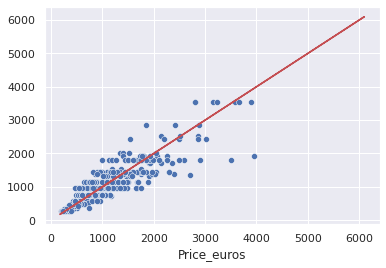

In [168]:
ax = sns.scatterplot(x=y_test, y=y_test_pred)
ax.plot(y_train, y_train, 'r')

In [169]:
RMSE = mse(y_test, y_test_pred)**0.5
RMSE

330.93426365305237

In [170]:
RMSLE = rmsle(y_test, y_test_pred.clip(min=0)) 
RMSLE

0.25223646839406777

In [171]:
RMSP = np.round(100*(np.expm1(RMSLE)), 2)
RMSP

28.69

Text(0.5, 8.95999999999998, 'prediction error')

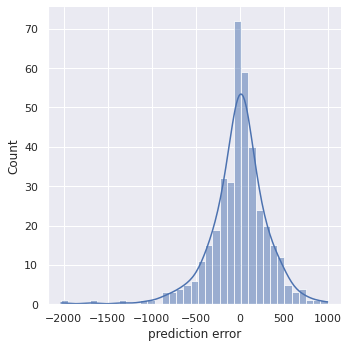

In [172]:
sns.displot(y_test_pred - y_test, kde=True)
plt.xlabel('prediction error')

In [173]:
testDf=pd.DataFrame({'y_test': y_test, 'y_test_pred': y_test_pred})

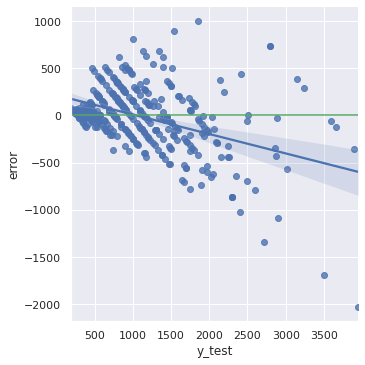

In [174]:
sns.lmplot(
    x='y_test', 
    y='error',
    data=testDf.assign(error = testDf['y_test_pred'] - testDf['y_test'])
)
#plt.ylim(np.array(plt.xlim())*1.2)
plt.axhline(0, c='g')

Text(0.5, 0, 'min samples per leaf')

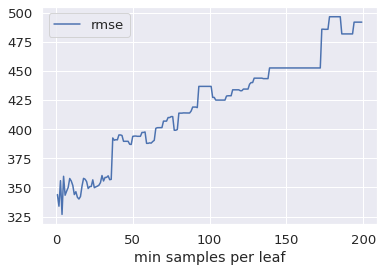

In [132]:
rmse_list = []

min_samples_leaf_range = range(1, 200)

result = pd.DataFrame(index=min_samples_leaf_range, columns =['rmse'])

for i in min_samples_leaf_range:
    model = DecisionTreeRegressor(min_samples_leaf=i)
    model.fit(X_train, y_train)
    y_fit = model.predict(X_test)
    rmse = np.sqrt(mse(y_test, y_fit))
    result.loc[i, 'rmse'] = rmse




result.plot()
plt.xlabel('min samples per leaf')

In [133]:
result.head(20)

rmse
1   343.861
2   333.861
3   355.789
4   326.812
5   359.551
6   343.286
7   346.796
8   349.984
9   357.667
10  355.506
11  351.721
12  343.841
13  346.304
14  341.525
15  340.022
16  342.181
17  351.132
18  357.779
19  357.034
20  354.965

Text(0.5, 0, 'max depth')

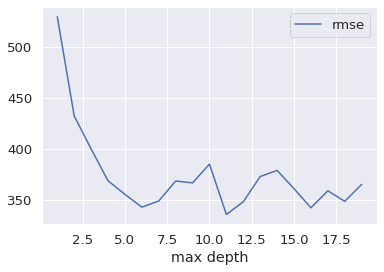

In [138]:
rmse_list = []

max_depth = range(1, 20)

result = pd.DataFrame(index=max_depth, columns =['rmse'])

for i in max_depth:
    model = DecisionTreeRegressor(max_depth=i)
    model.fit(X_train, y_train)
    y_fit = model.predict(X_test)
    rmse = np.sqrt(mse(y_test, y_fit))
    result.loc[i, 'rmse'] = rmse




result.plot()
plt.xlabel('max depth')

In [139]:
result.head(30)

rmse
1   529.294
2   432.189
3   399.868
4   368.772
5   355.395
6   342.884
7   348.913
8   368.461
9    366.63
10  385.032
11  335.765
12  348.165
13  372.872
14  378.792
15  360.962
16  342.245
17  358.886
18  348.567
19  365.142

rmse
2   342.246
3   357.881
4   366.018
5   354.609
6   356.168
7   338.939
8   323.102
9   315.681
10  332.977
11  328.485
12  314.453
13  315.754
14  315.684
15  314.991
16  313.783
17  326.427
18  326.561
19  326.799
20  327.403
21  325.008
22   323.76
23  332.594
24  332.238
25   331.74
26  332.059
27  339.239
28  339.043
29   339.44
30   338.77
31      339

Text(0.5, 0, 'min_samples_split')

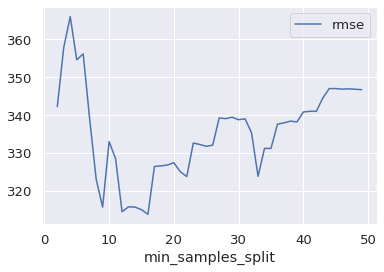

In [140]:
rmse_list = []

min_samples_split = range(2, 50)

result = pd.DataFrame(index=min_samples_split, columns =['rmse'])

for i in min_samples_split:
    model = DecisionTreeRegressor(min_samples_split=i)
    model.fit(X_train, y_train)
    y_fit = model.predict(X_test)
    rmse = np.sqrt(mse(y_test, y_fit))
    result.loc[i, 'rmse'] = rmse


display(result.head(30))
result.plot()
plt.xlabel('min_samples_split')

In [175]:
def visualize_tree(model, md=5):
    dot_data = StringIO()  
    export_graphviz(model, out_file=dot_data, feature_names=X_train.columns, max_depth=md)
    graph = pydot.graph_from_dot_data(dot_data.getvalue())[0]  
    return Image(graph.create_png(), width=800) 

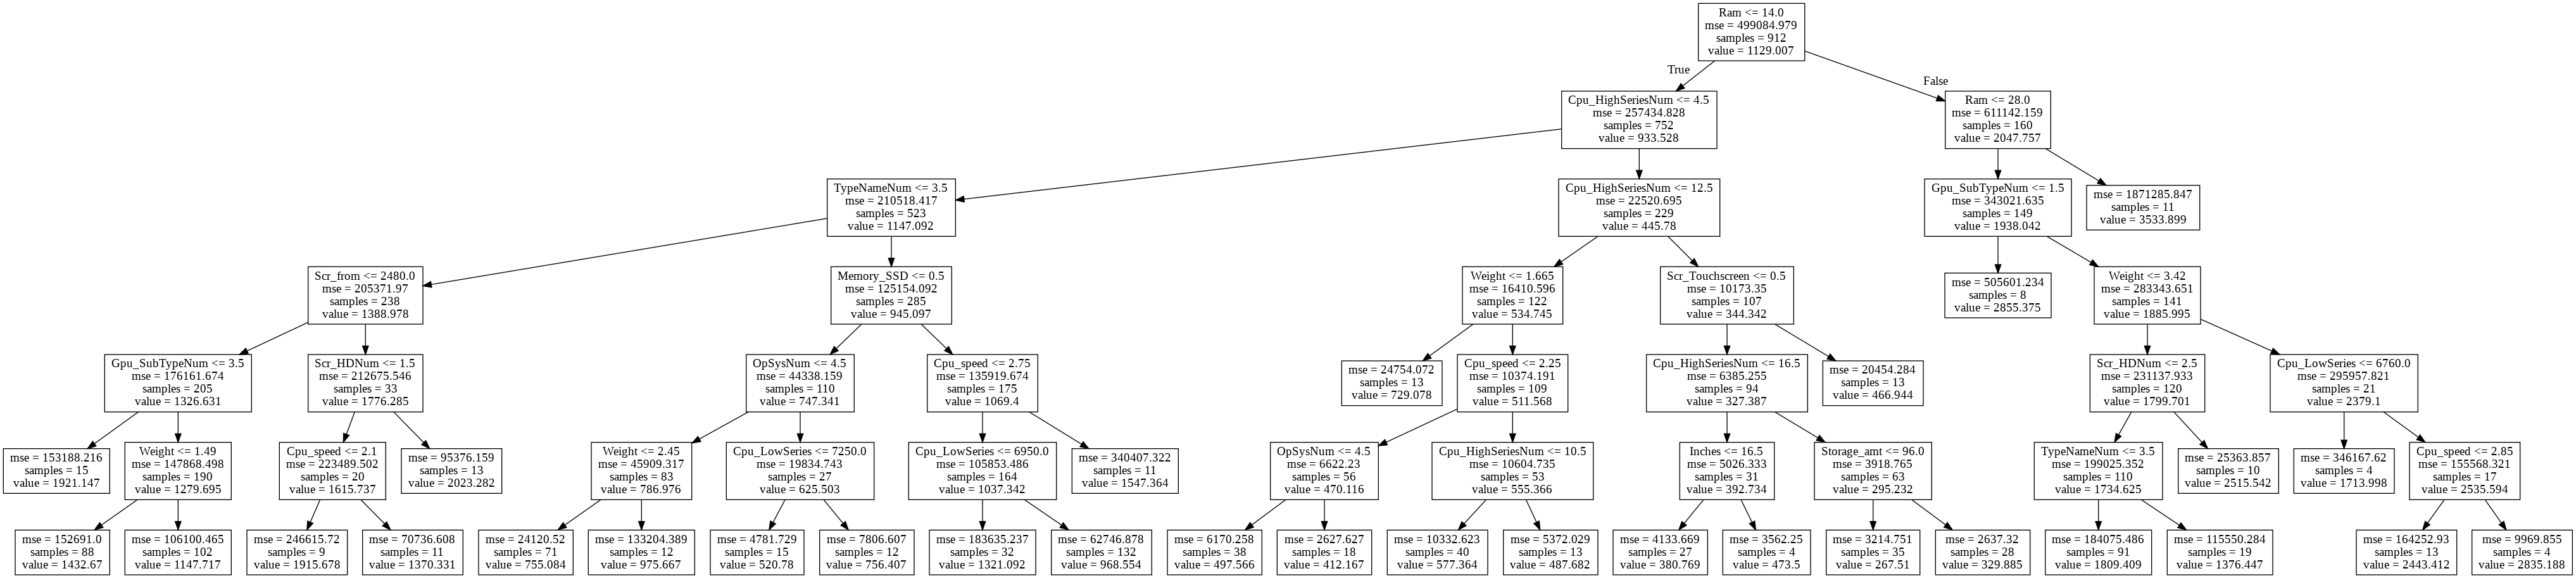

In [176]:
visualize_tree(model, md=10)

Text(0.5, 0, 'Relative Importance')

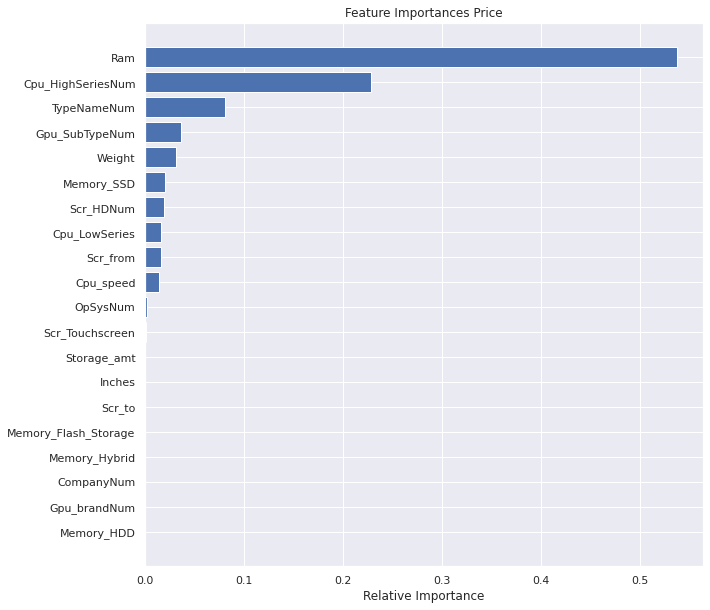

In [177]:
features=X_train.columns
importances = model.feature_importances_
indices = np.argsort(importances)
sns.set(font_scale=1)
plt.figure(figsize=(10,10))
plt.figure(1)
plt.title('Feature Importances Price')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

# remove Ram

In [178]:
X_train.columns

Index(['Inches', 'Ram', 'Weight', 'Storage_amt', 'Cpu_speed', 'Scr_from',
       'Scr_to', 'Memory_SSD', 'Memory_Flash_Storage', 'Memory_HDD',
       'Memory_Hybrid', 'Cpu_LowSeries', 'Scr_Touchscreen', 'CompanyNum',
       'TypeNameNum', 'Scr_HDNum', 'Cpu_HighSeriesNum', 'Gpu_brandNum',
       'Gpu_SubTypeNum', 'OpSysNum'],
      dtype='object')

In [179]:
X.shape

(1303, 20)

In [180]:
df_model.shape

(1303, 21)

In [181]:
X = df_model.drop(['Price_euros','Ram'], axis=1)
y = df_model['Price_euros']
feature_list = list(X.columns)

In [182]:
X.shape

(1303, 19)

In [183]:
X_train, X_test, y_train, y_test = split(X, y, test_size=0.3, random_state=314159)

In [189]:
#model = RandomForestClassifier()
model = DecisionTreeRegressor(max_depth=9, min_samples_leaf=15,min_samples_split=18).fit(X_train, y_train)

In [190]:
y_train_pred = model.predict(X_train)

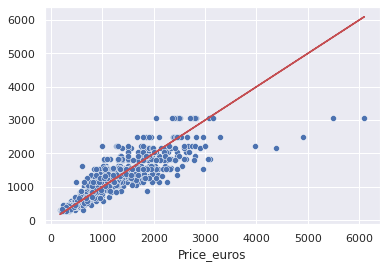

In [191]:
ax = sns.scatterplot(x=y_train, y=y_train_pred)
ax.plot(y_train, y_train, 'r')
sns.set(font_scale=1.2)

In [192]:
RMSE = mse(y_train, y_train_pred)**0.5
RMSE

354.3378140459322

In [193]:
y_test_pred = model.predict(X_test)

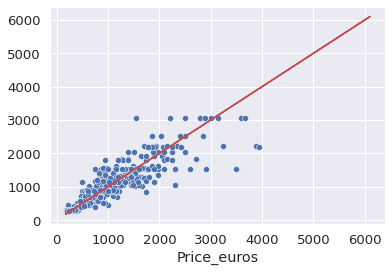

In [194]:
ax = sns.scatterplot(x=y_test, y=y_test_pred)
ax.plot(y_train, y_train, 'r')

In [195]:
RMSE = mse(y_test, y_test_pred)**0.5
RMSE

346.56489851125934

In [200]:
RMSLE = rmsle(y_test, y_test_pred.clip(min=0)) 
RMSLE

0.2624676074115191

In [201]:
RMSP = np.round(100*(np.expm1(RMSLE)), 2)
RMSP

30.01

Text(0.5, 11.552000000000007, 'prediction error')

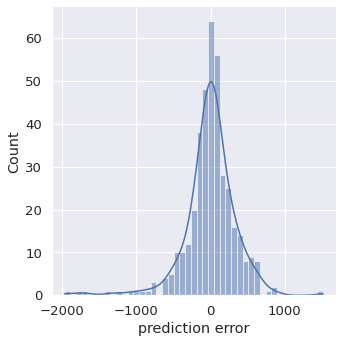

In [196]:
sns.displot(y_test_pred - y_test, kde=True)
plt.xlabel('prediction error')

In [197]:
testDf=pd.DataFrame({'y_test': y_test, 'y_test_pred': y_test_pred})

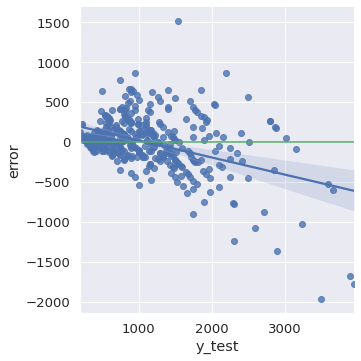

In [198]:
sns.lmplot(
    x='y_test', 
    y='error',
    data=testDf.assign(error = testDf['y_test_pred'] - testDf['y_test'])
)
#plt.ylim(np.array(plt.xlim())*1.2)
plt.axhline(0, c='g')

Text(0.5, 0, 'Relative Importance')

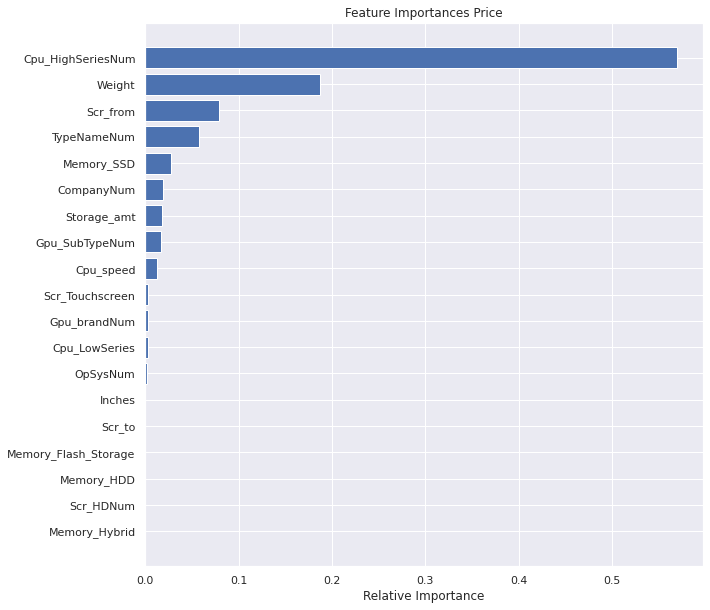

In [199]:
features=X_train.columns
importances = model.feature_importances_
indices = np.argsort(importances)
sns.set(font_scale=1)
plt.figure(figsize=(10,10))
plt.figure(1)
plt.title('Feature Importances Price')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

Text(0.5, 0, 'min samples per leaf')

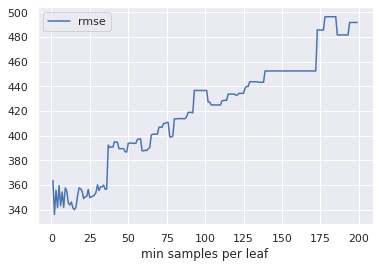

In [184]:
rmse_list = []

min_samples_leaf_range = range(1, 200)

result = pd.DataFrame(index=min_samples_leaf_range, columns =['rmse'])

for i in min_samples_leaf_range:
    model = DecisionTreeRegressor(min_samples_leaf=i)
    model.fit(X_train, y_train)
    y_fit = model.predict(X_test)
    rmse = np.sqrt(mse(y_test, y_fit))
    result.loc[i, 'rmse'] = rmse




result.plot()
plt.xlabel('min samples per leaf')

In [185]:
result.head(20)

rmse
1   363.694
2   336.233
3   355.792
4   341.676
5   359.594
6   343.286
7   354.479
8   341.888
9   357.667
10  355.506
11  345.636
12  343.841
13  346.304
14  341.525
15  340.022
16  342.181
17  351.132
18  357.779
19  357.034
20  354.965

Text(0.5, 0, 'max depth')

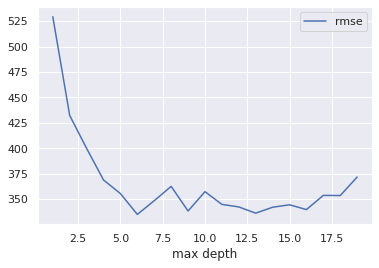

In [186]:
rmse_list = []

max_depth = range(1, 20)

result = pd.DataFrame(index=max_depth, columns =['rmse'])

for i in max_depth:
    model = DecisionTreeRegressor(max_depth=i)
    model.fit(X_train, y_train)
    y_fit = model.predict(X_test)
    rmse = np.sqrt(mse(y_test, y_fit))
    result.loc[i, 'rmse'] = rmse




result.plot()
plt.xlabel('max depth')

In [187]:
result.head(30)

rmse
1   529.294
2   432.189
3   399.868
4   368.772
5   355.395
6   334.909
7   348.405
8   362.494
9    338.24
10  357.286
11  344.766
12  342.272
13  336.151
14  341.958
15  344.385
16  339.657
17  353.627
18  353.466
19  371.651

rmse
2   346.307
3   384.608
4   353.144
5   368.679
6   339.653
7   338.517
8   341.287
9   315.941
10  335.489
11  327.641
12  328.124
13  326.729
14    318.6
15  316.203
16  312.514
17  326.432
18  314.444
19  326.845
20  327.297
21  325.008
22  324.171
23  332.264
24  331.907
25   331.74
26  332.075
27  339.224
28  339.058
29   339.44
30   338.77
31  327.384

Text(0.5, 0, 'min_samples_split')

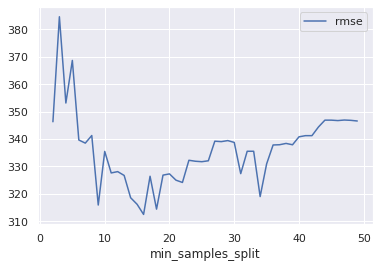

In [188]:
rmse_list = []

min_samples_split = range(2, 50)

result = pd.DataFrame(index=min_samples_split, columns =['rmse'])

for i in min_samples_split:
    model = DecisionTreeRegressor(min_samples_split=i)
    model.fit(X_train, y_train)
    y_fit = model.predict(X_test)
    rmse = np.sqrt(mse(y_test, y_fit))
    result.loc[i, 'rmse'] = rmse


display(result.head(30))
result.plot()
plt.xlabel('min_samples_split')

# remove all prediction more 3000

In [49]:
df_model_less3000=df_model[df_model['Price_euros']<=3000]

In [50]:
df_model_less3000.shape

(1284, 21)

In [204]:
X = df_model_less3000.drop(['Price_euros'], axis=1)
y = df_model_less3000['Price_euros']
feature_list = list(X.columns)

In [205]:
X.shape

(1284, 20)

In [206]:
X_train, X_test, y_train, y_test = split(X, y, test_size=0.3, random_state=314159)

Text(0.5, 0, 'min samples per leaf')

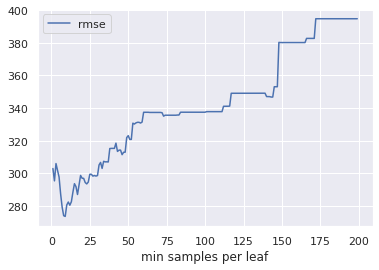

In [207]:
rmse_list = []

min_samples_leaf_range = range(1, 200)

result = pd.DataFrame(index=min_samples_leaf_range, columns =['rmse'])

for i in min_samples_leaf_range:
    model = DecisionTreeRegressor(min_samples_leaf=i)
    model.fit(X_train, y_train)
    y_fit = model.predict(X_test)
    rmse = np.sqrt(mse(y_test, y_fit))
    result.loc[i, 'rmse'] = rmse




result.plot()
plt.xlabel('min samples per leaf')

In [208]:
result.head(20)

rmse
1   302.903
2   295.338
3   305.953
4    301.86
5   297.694
6   287.432
7   279.251
8   273.974
9   273.542
10   280.54
11  282.358
12  280.405
13  282.538
14  288.363
15  293.618
16  291.826
17  286.982
18  292.937
19  298.668
20  296.935

Text(0.5, 0, 'max depth')

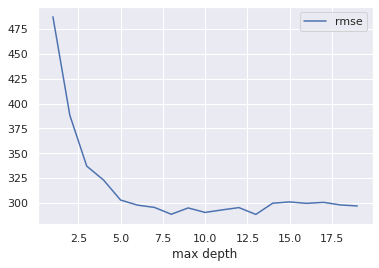

In [210]:
rmse_list = []

max_depth = range(1, 20)

result = pd.DataFrame(index=max_depth, columns =['rmse'])

for i in max_depth:
    model = DecisionTreeRegressor(max_depth=i)
    model.fit(X_train, y_train)
    y_fit = model.predict(X_test)
    rmse = np.sqrt(mse(y_test, y_fit))
    result.loc[i, 'rmse'] = rmse




result.plot()
plt.xlabel('max depth')

In [211]:
result.head(30)

rmse
1   487.414
2   388.304
3   337.143
4   323.008
5   302.988
6   297.864
7   295.572
8   288.679
9   295.037
10  290.508
11  293.036
12   295.38
13  288.518
14  299.809
15  301.088
16  299.647
17  300.669
18  298.047
19  297.019

rmse
2   302.556
3   302.002
4    296.24
5   288.348
6   279.607
7   280.109
8   277.585
9   282.707
10  282.056
11  275.847
12  279.389
13  275.268
14  272.347
15  273.193
16  273.415
17  274.232
18  273.784
19  277.292
20  276.935
21  276.268
22  280.334
23  281.269
24  279.516
25  280.003
26  282.174
27  278.963
28  278.411
29  283.896
30  283.802
31  283.802

Text(0.5, 0, 'min_samples_split')

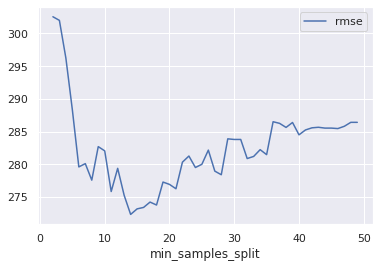

In [209]:
rmse_list = []

min_samples_split = range(2, 50)

result = pd.DataFrame(index=min_samples_split, columns =['rmse'])

for i in min_samples_split:
    model = DecisionTreeRegressor(min_samples_split=i)
    model.fit(X_train, y_train)
    y_fit = model.predict(X_test)
    rmse = np.sqrt(mse(y_test, y_fit))
    result.loc[i, 'rmse'] = rmse


display(result.head(30))
result.plot()
plt.xlabel('min_samples_split')

In [212]:
#model = RandomForestClassifier()
model = DecisionTreeRegressor(max_depth=8, min_samples_leaf=9,min_samples_split=18).fit(X_train, y_train)

In [213]:
y_train_pred = model.predict(X_train)

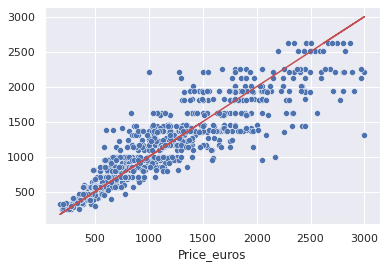

In [214]:
ax = sns.scatterplot(x=y_train, y=y_train_pred)
ax.plot(y_train, y_train, 'r')
sns.set(font_scale=1.2)

In [215]:
RMSE = mse(y_train, y_train_pred)**0.5
RMSE

271.30759610869296

In [216]:
y_test_pred = model.predict(X_test)

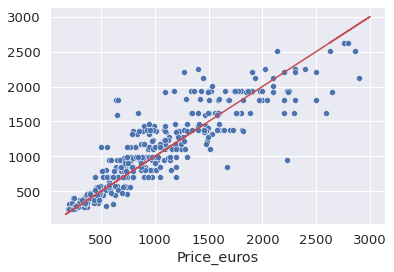

In [217]:
ax = sns.scatterplot(x=y_test, y=y_test_pred)
ax.plot(y_train, y_train, 'r')

In [218]:
RMSE = mse(y_test, y_test_pred)**0.5
RMSE

272.01261023569464

In [219]:
RMSLE = rmsle(y_test, y_test_pred.clip(min=0)) 
RMSLE

0.24008329923513202

In [220]:
RMSP = np.round(100*(np.expm1(RMSLE)), 2)
RMSP

27.14

Text(0.5, 11.552000000000007, 'prediction error')

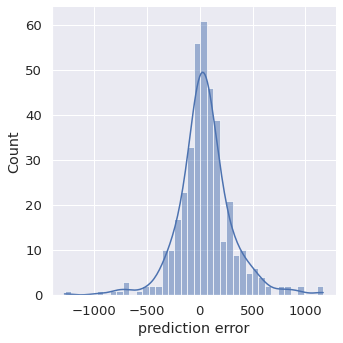

In [221]:
sns.displot(y_test_pred - y_test, kde=True)
plt.xlabel('prediction error')

In [222]:
testDf=pd.DataFrame({'y_test': y_test, 'y_test_pred': y_test_pred})

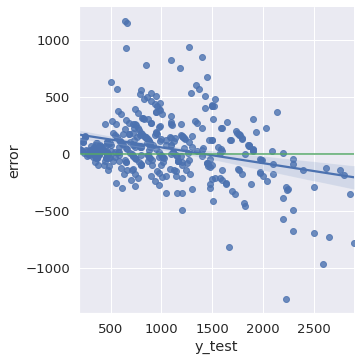

In [223]:
sns.lmplot(
    x='y_test', 
    y='error',
    data=testDf.assign(error = testDf['y_test_pred'] - testDf['y_test'])
)
#plt.ylim(np.array(plt.xlim())*1.2)
plt.axhline(0, c='g')

Text(0.5, 0, 'Relative Importance')

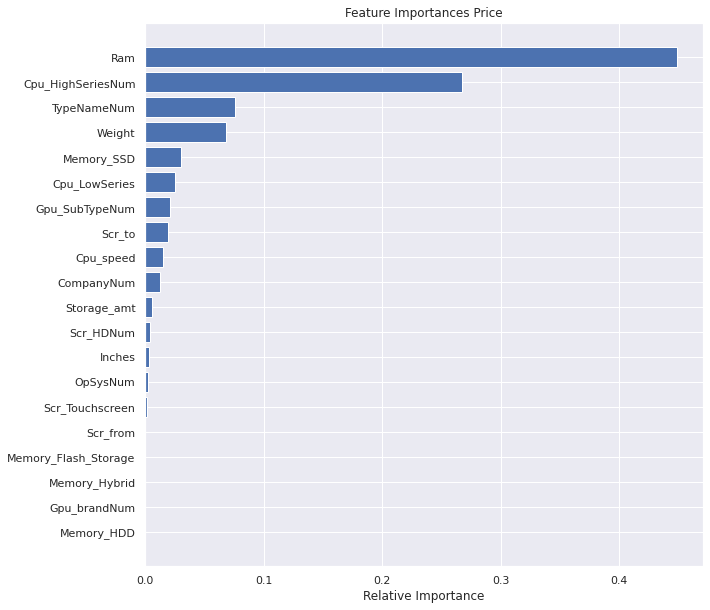

In [224]:
features=X_train.columns
importances = model.feature_importances_
indices = np.argsort(importances)
sns.set(font_scale=1)
plt.figure(figsize=(10,10))
plt.figure(1)
plt.title('Feature Importances Price')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

# Random Forest Model

In [51]:
X = df_model_less3000.drop('Price_euros', axis=1)
y = df_model_less3000['Price_euros']
feature_list = list(X.columns)

In [52]:
X_train, X_test, y_train, y_test = split(X, y, test_size=0.3, random_state=314159)

In [53]:
X.shape

(1284, 20)

In [228]:
# Baseline
# The baseline predictions are the historical averages
#baseline_preds = X_test[:, feature_list.index('average')]
# Baseline errors, and display average baseline error
#baseline_errors = abs(baseline_preds - y_test)
#print('Average baseline error: ', round(np.mean(baseline_errors), 2))

In [54]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train);

In [55]:
# Use the forest's predict method on the test data
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)
# Calculate the absolute errors
errors = abs(y_test_pred - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 186.4 degrees.


In [56]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 83.74 %.


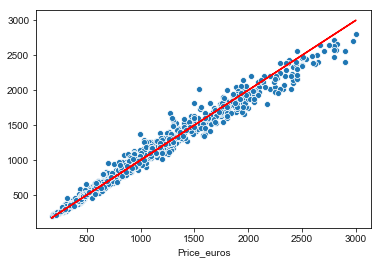

In [57]:
ax = sns.scatterplot(x=y_train, y=y_train_pred)
ax.plot(y_train, y_train, 'r')
sns.set(font_scale=1.2)

In [58]:
RMSE = mse(y_train, y_train_pred)**0.5
RMSE

93.40892942536671

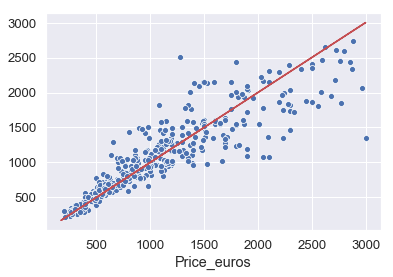

In [59]:
ax = sns.scatterplot(x=y_test, y=y_test_pred)
ax.plot(y_train, y_train, 'r')

In [60]:
RMSE = mse(y_test, y_test_pred)**0.5
RMSE

287.029836731731

In [61]:
RMSLE = rmsle(y_test, y_test_pred.clip(min=0)) 
RMSLE

0.20785030922171369

In [62]:
RMSP = np.round(100*(np.expm1(RMSLE)), 2)
RMSP

23.1

In [63]:
sns.displot(y_test_pred - y_test, kde=True)
plt.xlabel('prediction error')

AttributeError: module 'seaborn' has no attribute 'displot'

In [64]:
testDf=pd.DataFrame({'y_test': y_test, 'y_test_pred': y_test_pred})

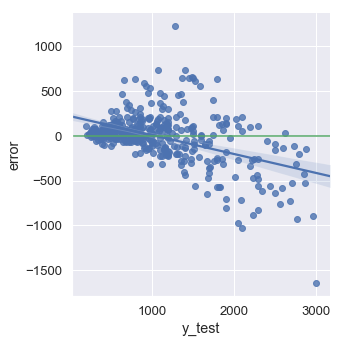

In [65]:
sns.lmplot(
    x='y_test', 
    y='error',
    data=testDf.assign(error = testDf['y_test_pred'] - testDf['y_test'])
)
#plt.ylim(np.array(plt.xlim())*1.2)
plt.axhline(0, c='g')

Text(0.5,0,'Relative Importance')

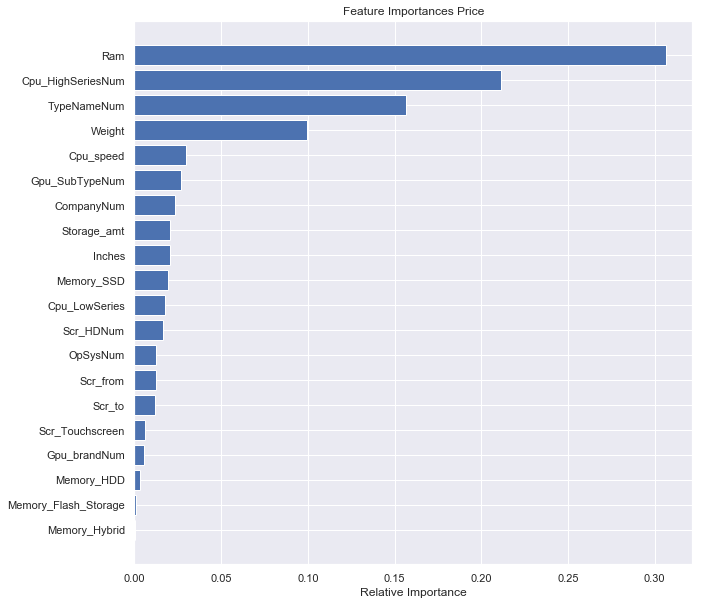

In [66]:
features=X_train.columns
importances = rf.feature_importances_
indices = np.argsort(importances)
sns.set(font_scale=1)
plt.figure(figsize=(10,10))
plt.figure(1)
plt.title('Feature Importances Price')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

In [ ]:
def Grid_Search_CV_RFR(X_train, y_train):
    from sklearn.model_selection import GridSearchCV
    from sklearn.model_selection import ShuffleSplit
    from sklearn.ensemble import RandomForestRegressor

    estimator = RandomForestRegressor()
    param_grid = { 
            "n_estimators"      : [10,200,500,1000],
            "max_features"      : ["auto", "sqrt", "log2"],
            "max_depth" :[4,8,10,12,16,20],
            "min_samples_split" : [2,4,8,10,12],
            "bootstrap": [True, False],
            }

    grid = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=5)

    grid.fit(X_train, y_train)

    return grid.best_score_ , grid.best_params_

In [ ]:
Grid_Search_CV_RFR(X_train,y_train)

(0.8277904357293634,
 {'bootstrap': False,
  'max_depth': 12,
  'max_features': 'log2',
  'min_samples_split': 2,
  'n_estimators': 1000})

# randomForest after Grid search

In [68]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000,max_depth=12,max_features='log2',min_samples_split=2,bootstrap=False, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train);

In [69]:
# Use the forest's predict method on the test data
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)
# Calculate the absolute errors
errors = abs(y_test_pred - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 182.23 degrees.


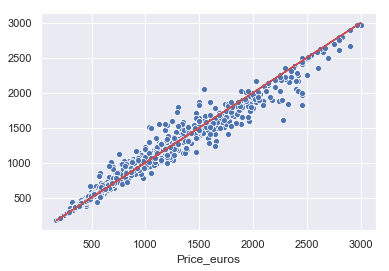

In [70]:
ax = sns.scatterplot(x=y_train, y=y_train_pred)
ax.plot(y_train, y_train, 'r')
sns.set(font_scale=1.2)

In [71]:
RMSE = mse(y_train, y_train_pred)**0.5
RMSE

112.10676352101211

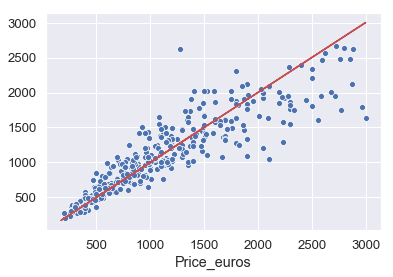

In [72]:
ax = sns.scatterplot(x=y_test, y=y_test_pred)
ax.plot(y_train, y_train, 'r')

In [73]:
RMSE = mse(y_test, y_test_pred)**0.5
RMSE

277.9653384075183

In [74]:
RMSLE = rmsle(y_test, y_test_pred.clip(min=0)) 
RMSLE

0.20600927983252454

In [75]:
RMSP = np.round(100*(np.expm1(RMSLE)), 2)
RMSP

22.88

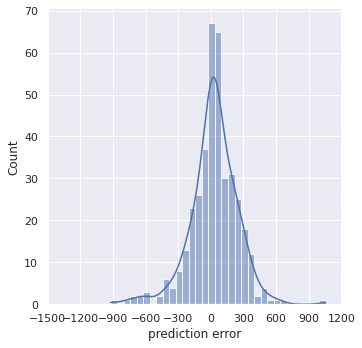

In [258]:

sns.set(rc={'figure.figsize':(15,13)})
sns.displot(y_test_pred - y_test, kde=True)
plt.xticks(list(range(-1500,1500,300)))
plt.xlabel('prediction error')
plt.show()

In [76]:
testDf=pd.DataFrame({'y_test': y_test, 'y_test_pred': y_test_pred})

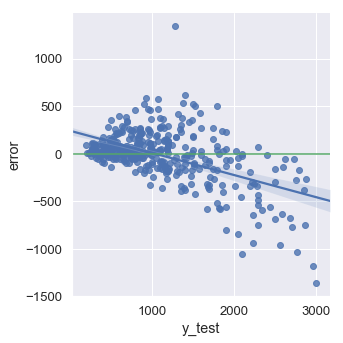

In [77]:
sns.lmplot(
    x='y_test', 
    y='error',
    data=testDf.assign(error = testDf['y_test_pred'] - testDf['y_test'])
)
#plt.ylim(np.array(plt.xlim())*1.2)
plt.axhline(0, c='g')

Text(0.5,0,'Relative Importance')

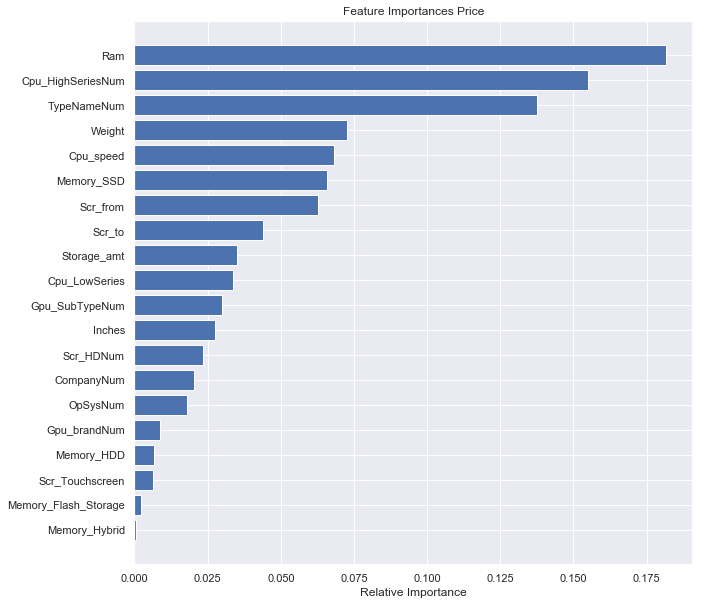

In [78]:
features=X_train.columns
importances = rf.feature_importances_
indices = np.argsort(importances)
sns.set(font_scale=1)
plt.figure(figsize=(10,10))
plt.figure(1)
plt.title('Feature Importances Price')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

# change columns type to category

In [79]:
df_model_less3000.head(5)

Inches  Ram  Weight  Storage_amt  Cpu_speed  Scr_from  Scr_to  \
563     17.0    8    3.40          256        2.8      1920    1080   
247     17.0   16    3.60          256        2.9      1920    1080   
517     16.0   24    2.24          512        2.8      1920    1080   
1017    17.0   16    2.40          512        2.7      3840    2160   
778     14.0   16    1.95          512        2.8      1920    1080   

      Memory_SSD  Memory_Flash_Storage  Memory_HDD  ...  Cpu_LowSeries  \
563            1                     0           0  ...           7700   
247            1                     0           0  ...           7820   
517            1                     0           0  ...           7700   
1017           1                     0           0  ...           6820   
778            1                     0           0  ...           7700   

      Scr_Touchscreen  CompanyNum  TypeNameNum  Scr_HDNum  Cpu_HighSeriesNum  \
563                 0          12            4          2                  2   
247                 0          11            1          2                  2   
517                 0          11            1          2                  2   
1017                0          12            4          0                  2   
778                 0           0            1          2                  2   

      Gpu_brandNum  Gpu_SubTypeNum  OpSysNum  Price_euros  
563              0               1         4       2999.0  
247              0               4         4       2999.0  
517              0               4         4       2968.0  
1017             0               1         1       2968.0  
778              0               4         4       2899.0  

[5 rows x 21 columns]

In [80]:
categoryCols=['CompanyNum','TypeNameNum','Scr_HDNum','Cpu_HighSeriesNum','Gpu_brandNum','Gpu_SubTypeNum','OpSysNum']

In [81]:
df_modelSetCat=df_model_less3000.copy()
df_modelSetCat[categoryCols]=df_modelSetCat[categoryCols].apply(lambda x: x.astype('category'))

In [82]:
df_modelSetCat.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1284 entries, 563 to 1215
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Inches                1284 non-null   float64 
 1   Ram                   1284 non-null   int32   
 2   Weight                1284 non-null   float64 
 3   Storage_amt           1284 non-null   int32   
 4   Cpu_speed             1284 non-null   float64 
 5   Scr_from              1284 non-null   int32   
 6   Scr_to                1284 non-null   int32   
 7   Memory_SSD            1284 non-null   int32   
 8   Memory_Flash_Storage  1284 non-null   int32   
 9   Memory_HDD            1284 non-null   int32   
 10  Memory_Hybrid         1284 non-null   int32   
 11  Cpu_LowSeries         1284 non-null   int32   
 12  Scr_Touchscreen       1284 non-null   int32   
 13  CompanyNum            1284 non-null   category
 14  TypeNameNum           1284 non-null   category
 15  Sc

In [83]:
X = df_modelSetCat.drop('Price_euros', axis=1)
y = df_modelSetCat['Price_euros']
feature_list = list(X.columns)

In [84]:
X_train, X_test, y_train, y_test = split(X, y, test_size=0.3, random_state=314159)

In [85]:
X.shape

(1284, 20)

In [86]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000,max_depth=12,max_features='log2',min_samples_split=2,bootstrap=False, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train);

In [87]:
# Use the forest's predict method on the test data
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)
# Calculate the absolute errors
errors = abs(y_test_pred - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 182.23 degrees.


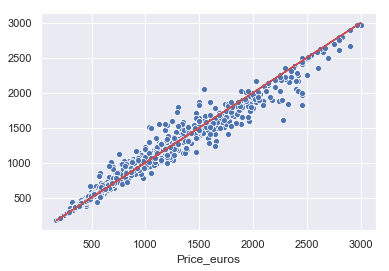

In [88]:
ax = sns.scatterplot(x=y_train, y=y_train_pred)
ax.plot(y_train, y_train, 'r')

In [89]:
RMSE = mse(y_train, y_train_pred)**0.5
RMSE

112.10676352101211

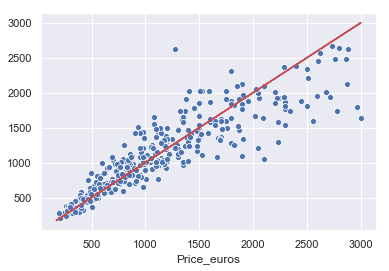

In [90]:
ax = sns.scatterplot(x=y_test, y=y_test_pred)
ax.plot(y_train, y_train, 'r')

In [91]:
RMSE = mse(y_test, y_test_pred)**0.5
RMSE

277.9653384075183

In [92]:
RMSLE = rmsle(y_test, y_test_pred.clip(min=0)) 
RMSLE

0.20600927983252454

In [93]:
RMSP = np.round(100*(np.expm1(RMSLE)), 2)
RMSP

22.88

Text(0.5,0,'Relative Importance')

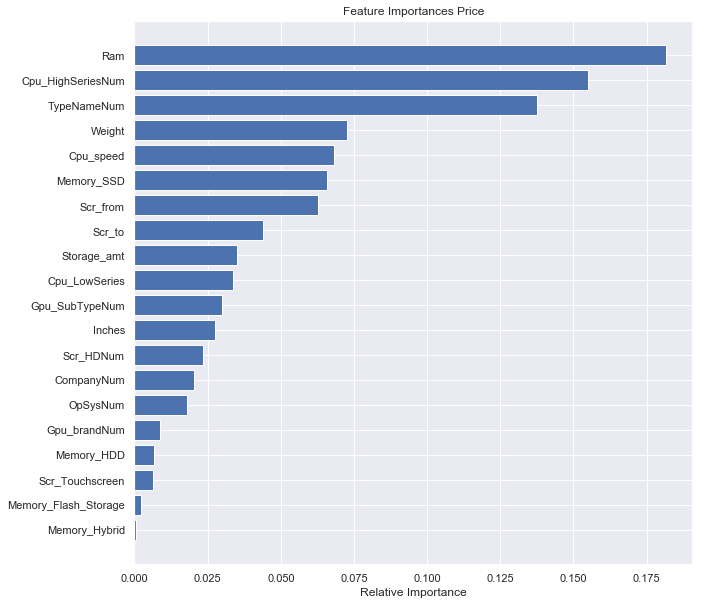

In [94]:
features=X_train.columns
importances = rf.feature_importances_
indices = np.argsort(importances)
sns.set(font_scale=1)
plt.figure(figsize=(10,10))
plt.figure(1)
plt.title('Feature Importances Price')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

# split data

In [95]:
df_modelMore3K=df_model[df_model['Price_euros']>1500]
df_modelLess3K=df_model[df_model['Price_euros']<=1500]
print(df_modelMore3K.shape)
print(df_modelLess3K.shape)

(304, 21)
(999, 21)


In [126]:
def runModel(df_model):
    X = df_model.drop('Price_euros', axis=1)
    y = df_model['Price_euros']
    feature_list = list(X.columns)
    X_train, X_test, y_train, y_test = split(X, y, test_size=0.3, random_state=314159)
    X_train, X_test, y_train, y_test
    print(X.shape)
    # Instantiate model with 1000 decision trees
    rf = RandomForestRegressor(n_estimators = 1000,max_depth=12,max_features='log2',min_samples_split=2,bootstrap=False, random_state = 42)
    # Train the model on training data
    rf.fit(X_train, y_train)
    # Use the forest's predict method on the test data
    y_train_pred = rf.predict(X_train)
    y_test_pred = rf.predict(X_test)
    # Calculate the absolute errors
    errors = abs(y_test_pred - y_test)
    # Print out the mean absolute error (mae)
    print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
    
    ax = sns.scatterplot(x=y_train, y=y_train_pred)
    ax.plot(y_train, y_train, 'r')
    plt.show()
    RMSE = mse(y_train, y_train_pred)**0.5
    print(' train RMSE is ', RMSE)
    ax = sns.scatterplot(x=y_test, y=y_test_pred)
    ax.plot(y_train, y_train, 'r')
    plt.show()
    RMSE = mse(y_test, y_test_pred)**0.5
    print('test RMSE is ',RMSE)

    RMSLE = rmsle(y_test, y_test_pred.clip(min=0)) 
    print('test RMSLE is ',RMSLE)
    
    RMSP = np.round(100*(np.expm1(RMSLE)), 2)
    print('test RMSLP is ',RMSP)
    features=X_train.columns
    
    importances = rf.feature_importances_
    indices = np.argsort(importances)
    sns.set(font_scale=1)
    plt.figure(figsize=(10,10))
    plt.figure(1)
    plt.title('Feature Importances Price')
    plt.barh(range(len(indices)), importances[indices], color='b', align='center')
    plt.yticks(range(len(indices)), features[indices])
    plt.xlabel('Relative Importance')
    plt.show()
    
    pd.DataFrame({'y_test':y_test,'y_test_pred': y_test_pred})  
    
    return pd.concat([X_test,pd.DataFrame({'y_test':y_test,'y_test_pred': y_test_pred})],axis=1),pd.DataFrame({'y_train': y_train,'y_train_pred': y_train_pred}),rf

In [109]:
def resModel(y_train, y_train_pred,y_test,y_test_pred):
    ax = sns.scatterplot(x=y_train, y=y_train_pred)
    ax.plot(y_train, y_train, 'r')
    plt.show()
    RMSE = mse(y_train, y_train_pred)**0.5
    print(' train RMSE is ', RMSE)
    ax = sns.scatterplot(x=y_test, y=y_test_pred)
    ax.plot(y_train, y_train, 'r')
    plt.show()
    RMSE = mse(y_test, y_test_pred)**0.5
    print('test RMSE is ',RMSE)

    RMSLE = rmsle(y_test, y_test_pred)# .clip(min=0) 
    print('test RMSLE is ',RMSLE)
    
    RMSP = np.round(100*(np.expm1(RMSLE)), 2)
    print('test RMSLP is ',RMSP)
    
#     sns.set(rc={'figure.figsize':(15,13)})
#     sns.displot(y_test_pred - y_test, kde=True)
#     plt.xticks(list(range(-1500,1500,300)))
#     plt.xlabel('prediction error')
#     plt.show()
    
    testDf=pd.DataFrame({'y_test': y_test, 'y_test_pred': y_test_pred})

    sns.lmplot(
        x='y_test', 
        y='error',
        data=testDf.assign(error = testDf['y_test_pred'] - testDf['y_test'])
    )
    #plt.ylim(np.array(plt.xlim())*1.2)
    plt.axhline(0, c='g')
    plt.show()
    
    return 

(999, 20)
Mean Absolute Error: 102.95 degrees.


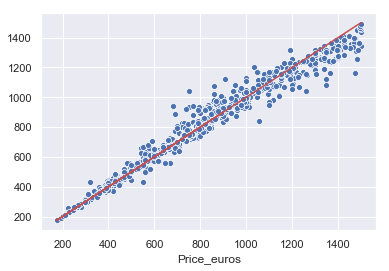

 train RMSE is  60.313405904293646


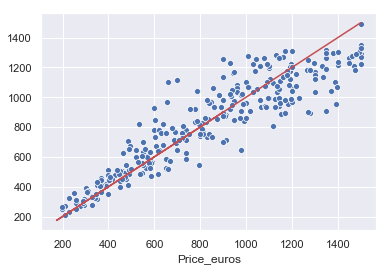

test RMSE is  138.58235743371029
test RMSLE is  0.15792433690317104
test RMSLP is  17.11


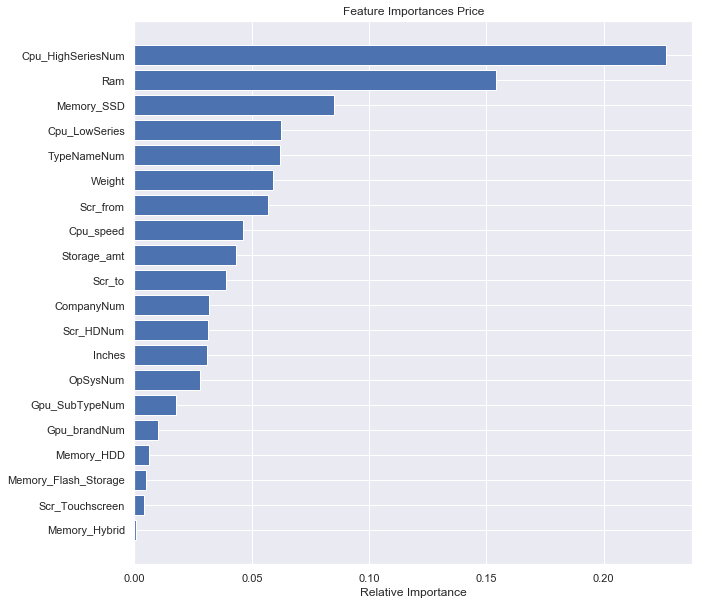

In [103]:
resDFLess3K=runModel(df_modelLess3K)

In [104]:
resDFLess3K[1].head(1)

y_train  y_train_pred
151    899.0    911.312173

(304, 20)
Mean Absolute Error: 303.9 degrees.


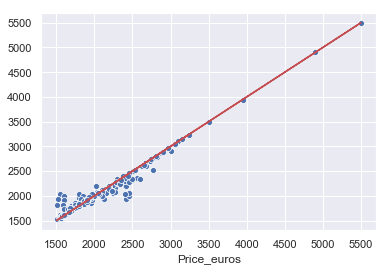

 train RMSE is  108.43036396099792


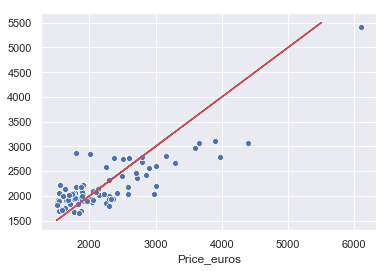

test RMSE is  399.85246845149413
test RMSLE is  0.1644076251354696
test RMSLP is  17.87


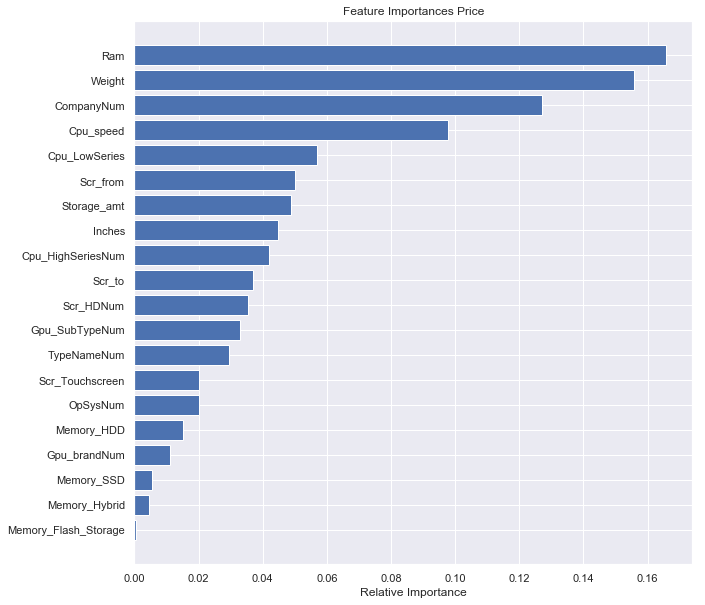

In [105]:
resDFMore3K=runModel(df_modelMore3K)

In [106]:
resDfTestBoth=resDFMore3K[0].append(resDFLess3K[0])
resDfTrainBoth=resDFMore3K[1].append(resDFLess3K[1])
print(resDfTestBoth.shape)
print(resDfTrainBoth.shape)

(392, 2)
(911, 2)


In [107]:
resDfTrainBoth.head()

y_train  y_train_pred
464   2090.0   2077.897129
795   2330.0   2322.048682
411   1943.0   1945.339924
730   1935.0   1961.001451
565   1599.0   1601.668957

In [108]:
resDFMore3K[0].shape

(92, 2)

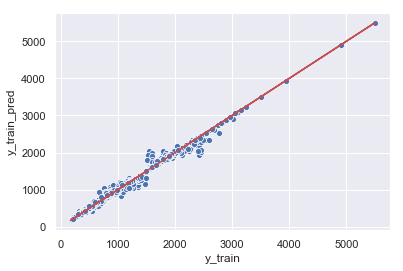

 train RMSE is  74.34508523186162


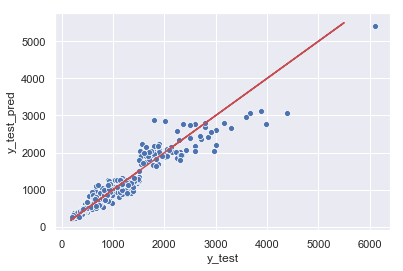

test RMSE is  228.51932786802024
test RMSLE is  0.15946959788415455
test RMSLP is  17.29


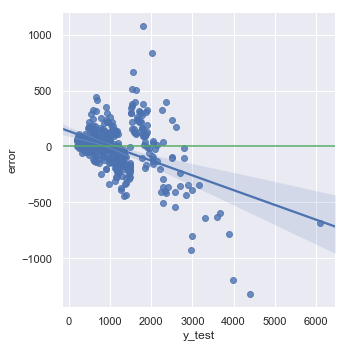

In [110]:
resModel(resDfTrainBoth.y_train,resDfTrainBoth.y_train_pred,resDfTestBoth.y_test,resDfTestBoth.y_test_pred)

# split less then 3000

In [113]:
df_model_less3000.shape

(1284, 21)

In [118]:
df_modelMore15K=df_model_less3000[df_model_less3000['Price_euros']>1500]
df_modelLess15K=df_model_less3000[df_model_less3000['Price_euros']<=1500]
print(df_modelMore3K.shape)
print(df_modelLess3K.shape)

(285, 21)
(999, 21)


(999, 20)
Mean Absolute Error: 102.95 degrees.


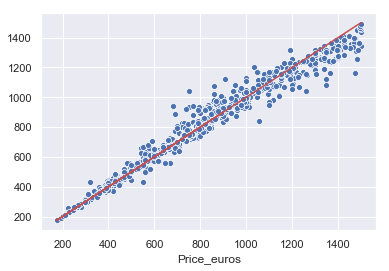

 train RMSE is  60.313405904293646


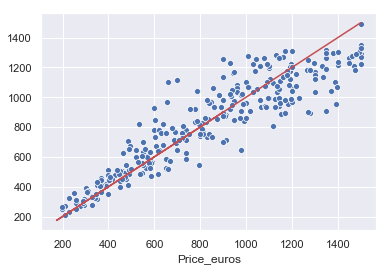

test RMSE is  138.58235743371029
test RMSLE is  0.15792433690317104
test RMSLP is  17.11


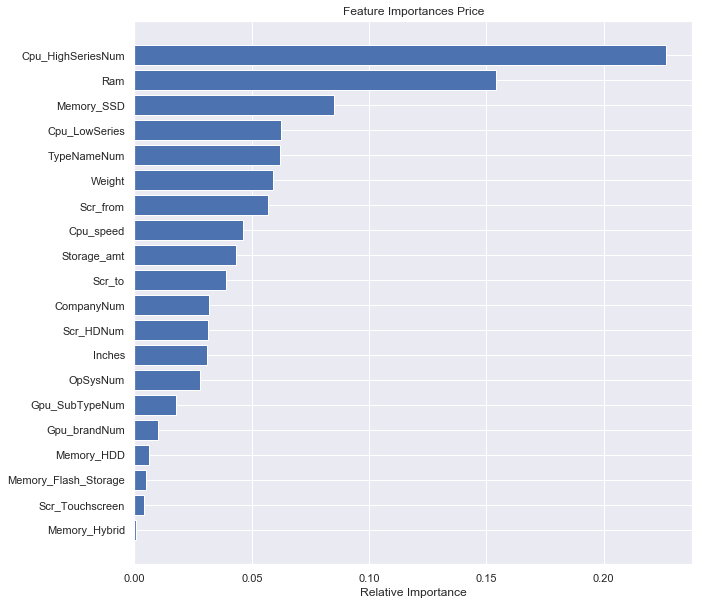

In [127]:
resDFLess15K=runModel(df_modelLess15K)

(285, 20)
Mean Absolute Error: 226.62 degrees.


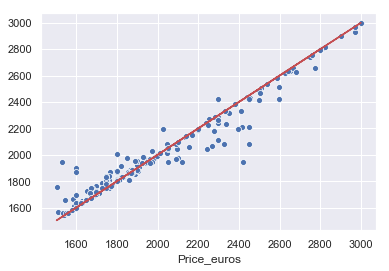

 train RMSE is  87.7989330730833


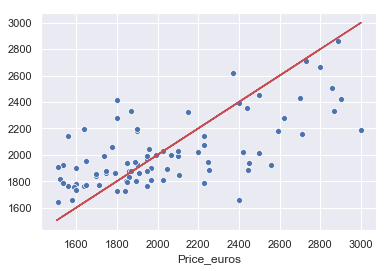

test RMSE is  296.00630283358277
test RMSLE is  0.14192519159031197
test RMSLP is  15.25


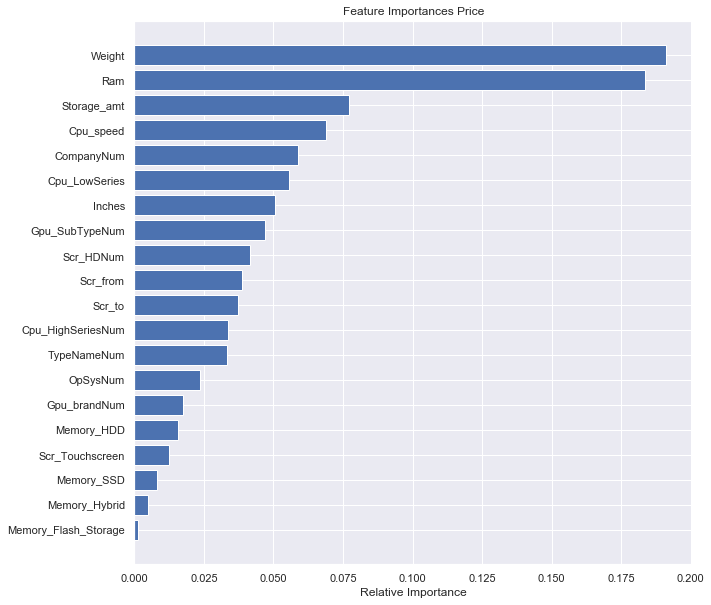

In [128]:
resDFMore15K=runModel(df_modelMore15K)

In [129]:
resDfTestBoth=resDFMore15K[0].append(resDFLess15K[0])
resDfTrainBoth=resDFMore15K[1].append(resDFLess15K[1])
print(resDfTestBoth.shape)
print(resDfTrainBoth.shape)

(386, 22)
(898, 2)


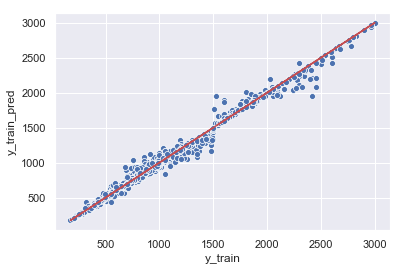

 train RMSE is  67.3783571287778


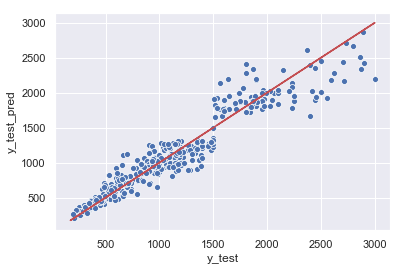

test RMSE is  185.60095524452936
test RMSLE is  0.15450326737138417
test RMSLP is  16.71


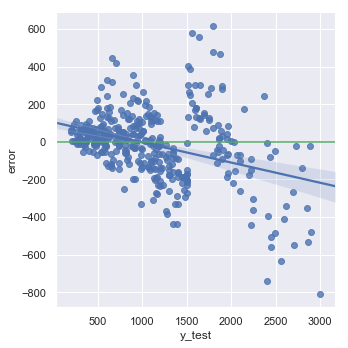

In [130]:
resModel(resDfTrainBoth.y_train,resDfTrainBoth.y_train_pred,resDfTestBoth.y_test,resDfTestBoth.y_test_pred)

In [135]:
pd.set_option('display.max_columns', 25)

In [138]:
resDfTestBoth.columns

Index(['Inches', 'Ram', 'Weight', 'Storage_amt', 'Cpu_speed', 'Scr_from',
       'Scr_to', 'Memory_SSD', 'Memory_Flash_Storage', 'Memory_HDD',
       'Memory_Hybrid', 'Cpu_LowSeries', 'Scr_Touchscreen', 'CompanyNum',
       'TypeNameNum', 'Scr_HDNum', 'Cpu_HighSeriesNum', 'Gpu_brandNum',
       'Gpu_SubTypeNum', 'OpSysNum', 'y_test', 'y_test_pred', 'Error'],
      dtype='object')

In [ ]:
resDfTestBoth['Error']=abs(resDfTestBoth['y_test']-resDfTestBoth['y_test_pred'])

In [143]:
resDfTestBoth.sort_values('Error',ascending=False).head(10)

Inches  Ram  Weight  Storage_amt  Cpu_speed  Scr_from  Scr_to  \
563     17.0    8    3.40          256        2.8      1920    1080   
1138    17.0   16    3.78          256        2.7      1920    1080   
857     13.0    8    1.28          256        2.8      1920    1080   
251     17.0   16    4.30          256        2.8      1920    1080   
757     16.0    8    2.59          256        2.6      1920    1080   
433     16.0   16    2.30          512        2.8      3840    2160   
1180    14.0    8    1.36          256        2.3      2560    1440   
398     16.0    8    1.78          256        2.8      3840    2160   
758     16.0   16    4.42          256        2.8      3840    2160   
1209    16.0   16    2.20          256        2.8      1920    1080   

      Memory_SSD  Memory_Flash_Storage  Memory_HDD  Memory_Hybrid  \
563            1                     0           0              0   
1138           1                     0           1              0   
857            1                     0           0              0   
251            1                     0           1              0   
757            1                     0           0              0   
433            1                     0           0              0   
1180           1                     0           0              0   
398            1                     0           0              0   
758            1                     0           1              0   
1209           1                     0           1              0   

      Cpu_LowSeries  Scr_Touchscreen  CompanyNum  TypeNameNum  Scr_HDNum  \
563            7700                0          12            4          2   
1138           6820                0           2            1          2   
857            7600                1          13            3          2   
251            7700                0          11            1          2   
757            6700                0          13            0          2   
433            7600                0          12            0          0   
1180           6200                1          12            3          3   
398            7700                1           9            0          0   
758            7700                0           9            1          0   
1209           7700                0          11            1          2   

      Cpu_HighSeriesNum  Gpu_brandNum  Gpu_SubTypeNum  OpSysNum   y_test  \
563                   2             0               1         4  2999.00   
1138                  2             0               4         4  2399.00   
857                   2             1               6         4  2559.00   
251                   2             0               4         4  1799.00   
757                   2             0               1         1  1561.00   
433                   2             0               4         4  2445.00   
1180                  4             1               6         4  1637.00   
398                   2             0               1         4  2712.00   
758                   2             0               4         4  2868.99   
1209                  2             0               4         4  2449.00   

      y_test_pred       Error  
563   2190.428506  808.571494  
1138  1659.417134  739.582866  
857   1926.885881  632.114119  
251   2413.711767  614.711767  
757   2139.912667  578.912667  
433   1887.202809  557.797191  
1180  2191.742153  554.742153  
398   2160.809002  551.190998  
758   2334.166850  534.823150  
1209  1940.618288  508.381712

In [148]:
companies=df[['Company','CompanyNum']].drop_duplicates()

companies.head()

Company  CompanyNum
196    Razer           0
610   Lenovo          12
749       HP          13
1066    Asus          11
723     Dell           9

In [146]:
resDfTestBoth.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 386 entries, 1050 to 1
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Inches                386 non-null    float64
 1   Ram                   386 non-null    int32  
 2   Weight                386 non-null    float64
 3   Storage_amt           386 non-null    int32  
 4   Cpu_speed             386 non-null    float64
 5   Scr_from              386 non-null    int32  
 6   Scr_to                386 non-null    int32  
 7   Memory_SSD            386 non-null    int32  
 8   Memory_Flash_Storage  386 non-null    int32  
 9   Memory_HDD            386 non-null    int32  
 10  Memory_Hybrid         386 non-null    int32  
 11  Cpu_LowSeries         386 non-null    int32  
 12  Scr_Touchscreen       386 non-null    int32  
 13  CompanyNum            386 non-null    int64  
 14  TypeNameNum           386 non-null    int64  
 15  Scr_HDNum             

In [150]:

resDfTestBoth.merge(companies,on='CompanyNum',how='inner')\
    .sort_values('Error',ascending=False)\
    [['Weight','Ram','Storage_amt','Cpu_speed','Company','CompanyNum','Cpu_HighSeriesNum','Memory_SSD','Cpu_LowSeries',
      'y_test_pred','y_test','Error']].head(10)

Weight  Ram  Storage_amt  Cpu_speed Company  CompanyNum  \
10     3.40    8          256        2.8  Lenovo          12   
335    3.78   16          256        2.7     MSI           2   
248    1.28    8          256        2.8      HP          13   
173    4.30   16          256        2.8    Asus          11   
253    2.59    8          256        2.6      HP          13   
13     2.30   16          512        2.8  Lenovo          12   
4      1.36    8          256        2.3  Lenovo          12   
86     1.78    8          256        2.8    Dell           9   
83     4.42   16          256        2.8    Dell           9   
176    2.20   16          256        2.8    Asus          11   

     Cpu_HighSeriesNum  Memory_SSD  Cpu_LowSeries  y_test_pred   y_test  \
10                   2           1           7700  2190.428506  2999.00   
335                  2           1           6820  1659.417134  2399.00   
248                  2           1           7600  1926.885881  2559.00   
173                  2           1           7700  2413.711767  1799.00   
253                  2           1           6700  2139.912667  1561.00   
13                   2           1           7600  1887.202809  2445.00   
4                    4           1           6200  2191.742153  1637.00   
86                   2           1           7700  2160.809002  2712.00   
83                   2           1           7700  2334.166850  2868.99   
176                  2           1           7700  1940.618288  2449.00   

          Error  
10   808.571494  
335  739.582866  
248  632.114119  
173  614.711767  
253  578.912667  
13   557.797191  
4    554.742153  
86   551.190998  
83   534.823150  
176  508.381712

In [153]:

resDfTestBoth.merge(companies,on='CompanyNum',how='inner')\
    .sort_values('Error',ascending=False)\
    [['Weight','Ram','Storage_amt','Cpu_speed','Company','CompanyNum','Cpu_HighSeriesNum','Memory_SSD','Cpu_LowSeries',
      'y_test_pred','y_test','Error']].tail(10)

Weight  Ram  Storage_amt  Cpu_speed Company  CompanyNum  \
195    2.20    4          500        2.5    Asus          11   
361    2.20   12         1000        1.6    Acer          15   
127    1.56    8          256        1.8    Dell           9   
98     2.23    8           64        3.0    Dell           9   
123    2.36    8         1000        2.7    Dell           9   
274    2.04    6         1000        2.9      HP          13   
281    2.10    4          500        1.5      HP          13   
339    2.90   16          256        2.8     MSI           2   
289    2.10    4          500        1.6      HP          13   
348    2.20    8          128        2.8     MSI           2   

     Cpu_HighSeriesNum  Memory_SSD  Cpu_LowSeries  y_test_pred   y_test  \
195                  2           0           6500   723.442826   720.32   
361                  4           0           8250   690.907457   693.99   
127                  2           1           8550  1051.617252  1049.00   
98                   0           0              0  1995.358242  1993.00   
123                  2           0           7500   751.299777   749.00   
274                 11           0           9410   547.831273   549.99   
281                 19           0           9000   328.091304   330.00   
339                  2           1           7700  2027.355703  2029.00   
289                 18           0           3060   348.531189   347.00   
348                  2           1           7700  1199.402320  1199.00   

        Error  
195  3.122826  
361  3.082543  
127  2.617252  
98   2.358242  
123  2.299777  
274  2.158727  
281  1.908696  
339  1.644297  
289  1.531189  
348  0.402320

# final df

In [171]:
modelsDF=pd.DataFrame(columns=['ModelType','ModelDescription','RMSE train','RMSE test','RMSLE test','RMSP test'])
modelsDF.head()

Empty DataFrame
Columns: [ModelType, ModelDescription, RMSE train, RMSE test, RMSLE test, RMSP test]
Index: []

In [172]:
modelsDF=modelsDF.append({'ModelType':'DecisionTree','ModelDescription':'all categorial peatures in on column','RMSE train':333,
                 'RMSE test':330,'RMSLE test':0.25,'RMSP test':28.69},ignore_index=True)
modelsDF=modelsDF.append({'ModelType':'DecisionTree','ModelDescription':'remove Ram as higher importance','RMSE train':354,
                 'RMSE test':346,'RMSLE test':0.26,'RMSP test':30.01},ignore_index=True)
modelsDF=modelsDF.append({'ModelType':'DecisionTree','ModelDescription':'filtter  rows with price more than 3000','RMSE train':271,
                 'RMSE test':272,'RMSLE test':0.24,'RMSP test':27.14},ignore_index=True)
modelsDF=modelsDF.append({'ModelType':'RandomForest','ModelDescription':'default Hyper parameters with 1000 estimators','RMSE train':93,
                 'RMSE test':287,'RMSLE test':0.20,'RMSP test':23.1},ignore_index=True)
modelsDF=modelsDF.append({'ModelType':'RandomForest','ModelDescription':'add hyper parameters after grid search','RMSE train':112,
                 'RMSE test':277,'RMSLE test':0.20,'RMSP test':22.88},ignore_index=True)
modelsDF=modelsDF.append({'ModelType':'RandomForest','ModelDescription':'change categorial columns to categoty type','RMSE train':112,
                 'RMSE test':277,'RMSLE test':0.20,'RMSP test':22.88},ignore_index=True)
modelsDF=modelsDF.append({'ModelType':'RandomForest','ModelDescription':'split data for two models with more and less than 1500 price.without filter of more 3000','RMSE train':74,
                 'RMSE test':228,'RMSLE test':0.15,'RMSP test':17.29},ignore_index=True)
modelsDF=modelsDF.append({'ModelType':'RandomForest','ModelDescription':'split data for two models with more and less than 1500 price.with filterof more 3000','RMSE train':67,
                 'RMSE test':185,'RMSLE test':0.15,'RMSP test':16.71},ignore_index=True)


In [173]:
modelsDF

ModelType                                   ModelDescription RMSE train  \
0  DecisionTree               all categorial peatures in on column        333   
1  DecisionTree                    remove Ram as higher importance        354   
2  DecisionTree            filtter  rows with price more than 3000        271   
3  RandomForest      default Hyper parameters with 1000 estimators         93   
4  RandomForest             add hyper parameters after grid search        112   
5  RandomForest         change categorial columns to categoty type        112   
6  RandomForest  split data for two models with more and less t...         74   
7  RandomForest  split data for two models with more and less t...         67   

  RMSE test  RMSLE test  RMSP test  
0       330        0.25      28.69  
1       346        0.26      30.01  
2       272        0.24      27.14  
3       287        0.20      23.10  
4       277        0.20      22.88  
5       277        0.20      22.88  
6       228        0.15      17.29  
7       185        0.15      16.71

# end code of itay

In [ ]:
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# Use dot file to create a graph
#(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
#graph.write_png('tree.png')

In [ ]:
# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(X_train, y_train)
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');

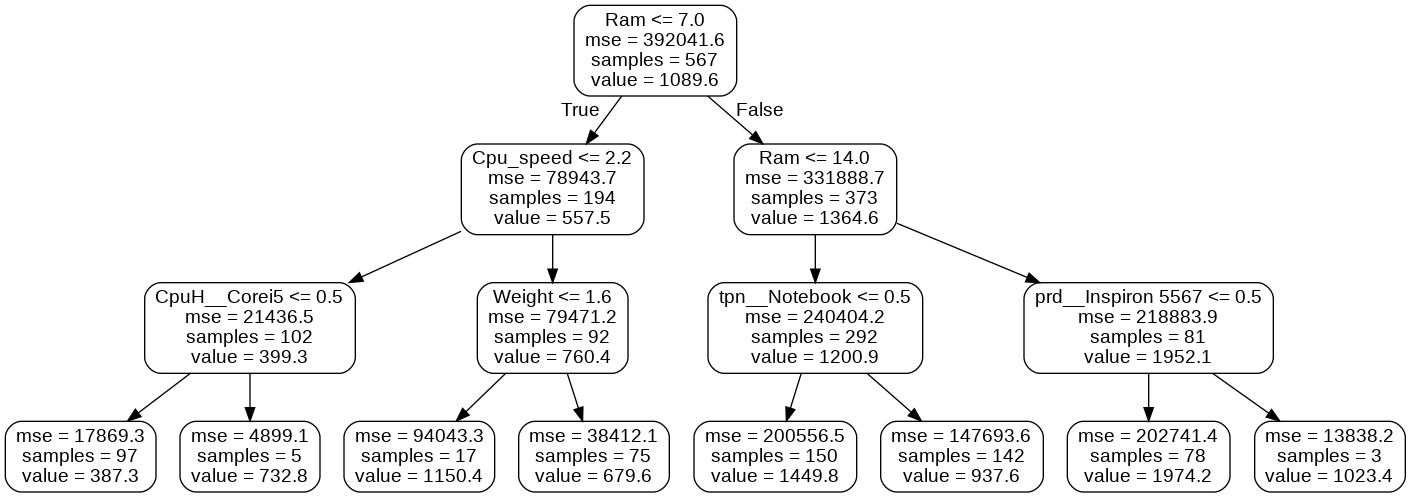

In [ ]:
### display small_tree.png
Image(filename='small_tree.png') 

In [ ]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
#[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

# if required to re-run the model

In [ ]:
# New random forest with only the two most important variables
rf_most_important = RandomForestRegressor(n_estimators= 1000, random_state=42)
# Extract the two most important features
important_indices = [feature_list.index('Ram'), feature_list.index('Weight'), feature_list.index('tpn__Notebook')]
#train_important = X_train[:, important_indices]
#test_important = X_test[:, important_indices]
# Train the random forest
#rf_most_important.fit(train_important, train_labels)
# Make predictions and determine the error
#predictions = rf_most_important.predict(test_important)
#errors = abs(predictions - test_labels)
# Display the performance metrics
#print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
#mape = np.mean(100 * (errors / test_labels))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

TypeError: ignored

In [ ]:
importances.sort(reverse=True)

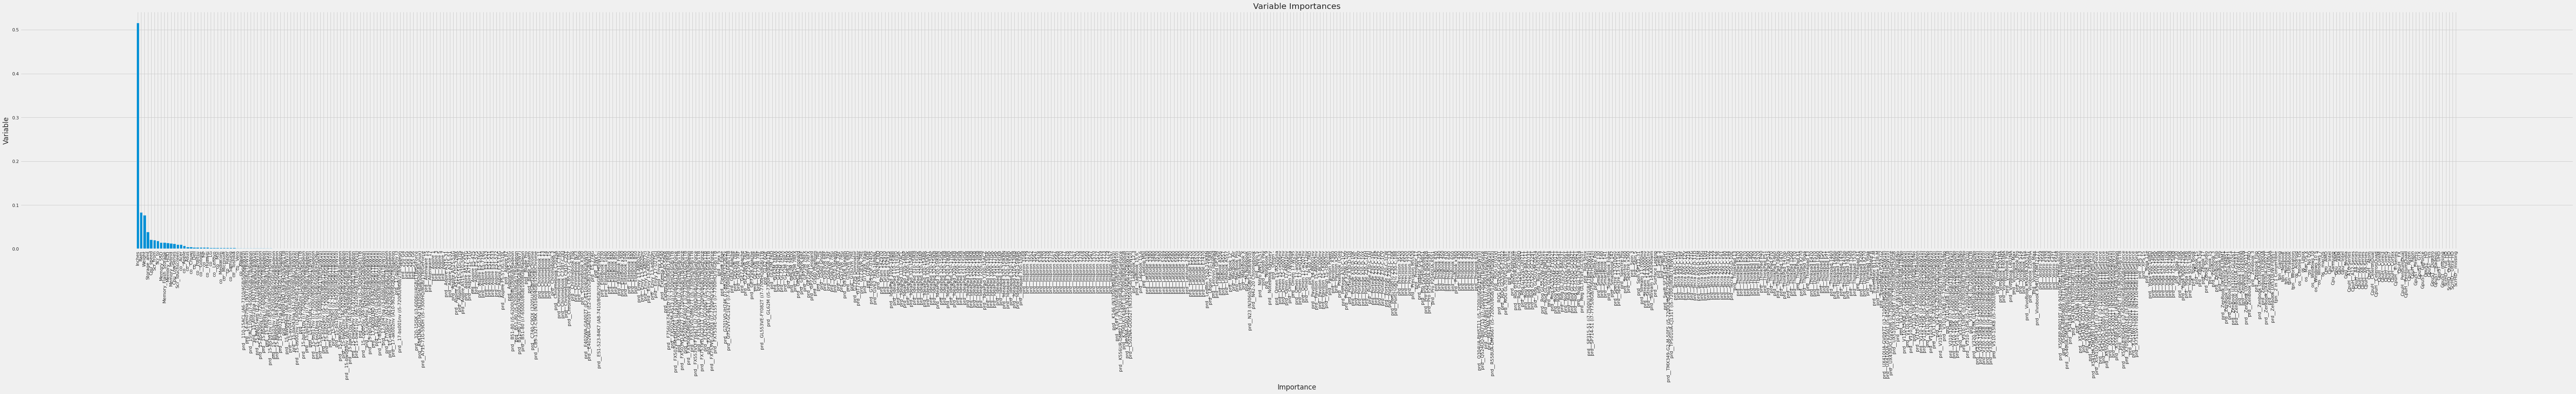

In [ ]:
plt.figure(figsize=(100,10))
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.xlabel('Importance'); plt.ylabel('Variable'); plt.title('Variable Importances');

# Linear Regression Model

In [ ]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
X = df_model.drop('Price_euros', axis=1)
y = df_model['Price_euros']
feature_list = list(X.columns)

X_train, X_test, y_train, y_test = split(X, y, test_size=0.3, random_state=314159)

In [ ]:
#print(__doc__)

Automatically created module for IPython interactive environment


In [ ]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

In [ ]:
print(regr.intercept_)

-242.41816224976424


In [ ]:
# The coefficients
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [ 1.23708540e+01  2.53788952e+01  3.72780135e+01  1.96898769e-01
  3.51467793e+01 -6.47932913e-02  5.38655105e-01  2.11622771e+02
  2.81333729e+02  3.15803208e+01 -1.10059940e+02 -2.59484086e-02
 -3.58023033e+01 -1.14425126e+02  2.59933553e+01 -1.19671914e+02
 -3.48025310e+02 -1.67919725e+02 -2.81414390e+02  8.56994191e+01
 -1.49589867e+02  2.58810970e+01  5.66349904e+02 -1.42670207e+02
  2.10270151e+02 -2.16412872e+02  2.28386433e+02  3.82966927e+02
  1.26942987e+02  2.37067574e+02 -3.43778133e+02 -5.65030323e+00
  4.77234607e-09 -6.00778642e+02 -3.60523619e+02 -6.29248151e+02
 -3.15128600e+01 -4.53369633e+02 -3.79951629e+02 -4.62075328e+02
 -4.23930495e+02 -3.43196617e+02  7.62759100e-09  8.21440693e-11
 -1.31964298e+02 -1.93205537e+01 -4.91164944e+02 -5.99961473e+01
 -3.20147424e+02 -3.89878674e+02 -2.63515074e+02 -4.07480039e+02
 -3.57785599e+02  2.76543233e-11 -2.37121935e+02 -2.79883523e+02
 -3.67088485e+02 -1.36151357e-09 -3.90798505e-10 -2.90026492e-09
 -1.02255

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 202.7335898401596
Root Mean Squared Error: 301.93258605964144


In [ ]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))

Mean squared error: 91163.29


In [ ]:
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

Coefficient of determination: 0.77


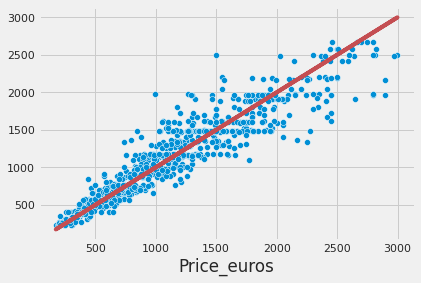

In [ ]:
ax = sns.scatterplot(x=y_train, y=y_train_pred)
ax.plot(y_train, y_train, 'r')

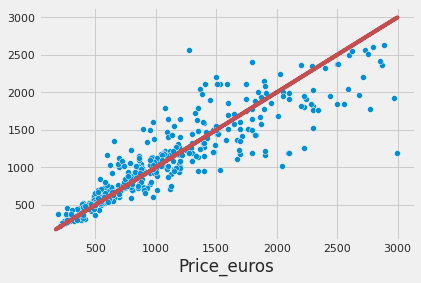

In [ ]:
ax = sns.scatterplot(x=y_test, y=y_test_pred)
ax.plot(y_train, y_train, 'r')

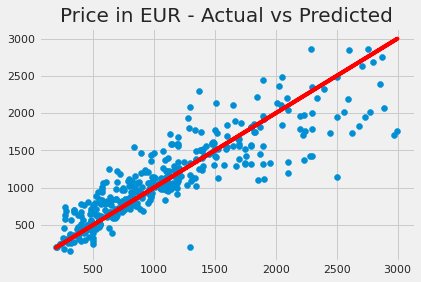

In [ ]:
plt.scatter(y_test, y_pred)
plt.plot(y_test,y_test,  c='red')
plt.title('Price in EUR - Actual vs Predicted', size=20)
plt.show()

Text(0.5, 11.120000000000005, 'prediction error (EUR)')

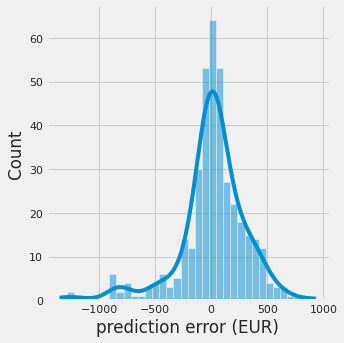

In [ ]:
sns.displot(y_pred - y_test, kde=True)
plt.xlabel('prediction error (EUR)')

# K Nearest Neighbors Model